<div class="alert alert-info" style="background-color: lightgray;">
    <h1>
        <center>
        <font size="8"><strong> Using Machine Learning Models to Predict Stock Returns for Apple Inc.<font>
        </center>
    </h1>
</div>

**In this project**, we will use various Machine Learning models, including Linear Regression, Logistic Regression, Support Vector Machines, and LSTM, to predict whether the stock return of a company will increase or decrease (Buy or Not to Buy). Our predictions will be based on historical quarterly stock data, the company's fundamental financials, and U.S. economic indicators. We will use quarterly data from 2014 until the end of 2023.

Our approach distinguishes itself from generic methods found online by not focusing on predicting prices or returns for profit maximization. Instead, we aim to adopt a risk-averse strategy by using ML models to predict whether the return will be positive or negative in the next quarter. Our goal is to invest only if the return is predicted to be positive in the next quarter. In other words, we want to avoid investing if the model predicts that the return will be negative. This strategy serves as a hedge against inflation, ensuring that we invest in opportunities with positive returns rather than losing money to inflation.

---

### **Use of Linear Regression**
Although Linear Regression is a linear model and may struggle to detect patterns in non-linear data structures, we will observe that it performs well initially (before feature engineering). Even though our task is binary (to predict whether to buy (1) or not to buy (0) the stock next quarter), we will use Linear Regression in the following way:

1. **Target Variable**: Define the target variable as the `relative_change_in_stock_price_next_quarter`. 
2. **Training Process**: Train the model using features outlined above to learn the parameters. 
3. **Prediction**: Predict the target variable for the test set and compare the signs (relative change) of the predicted and actual target values:
   - If the predicted and actual signs match, assign 1.
   - Otherwise, assign 0.
4. **Evaluation**: Calculate the accuracy as the average of these assigned values and use a classification report to assess performance, including precision, recall, and F1-score.

For our task, the **most important metric is Recall for the case where the model outputs 0 (~Buy)**. We aim to ensure that, for all actual instances of class 0 (cases where we should not buy), our model correctly predicts as many of them as possible.

---

### **Use of Logistic Regression**
Logistic Regression, despite being a linear model, often performs well as a baseline before introducing feature engineering. 

1. **Target Variable**: Define the target as a binary variable, `Buy`, where:
   - `1`: Stock return next quarter (relative to the current quarter) will increase.
   - `0`: Otherwise.
2. **Training Process**: Learn model parameters using the training dataset consisting of the features outlined above. 
3. **Prediction**: Predict whether to Buy (1) or Not Buy (0) for quarters in the test set.
4. **Evaluation**: Measure model performance using accuracy, precision, recall, and F1-score. 

Similar to Linear Regression, the **most important metric is Recall for the case where the model outputs 0 (~Not Buy)**. We need the model to correctly identify instances where buying should be avoided.

---

### **Use of Support Vector Machine**
Support Vector Machines (SVM) are well-suited for detecting non-linear patterns in data. 

1. **Target Variable**: The target, `Buy`, is defined as:
   - `1`: Stock return next quarter (relative to the current quarter) will increase.
   - `0`: Otherwise.
2. **Training Process**: Train the SVM model using the features outlined above. 
3. **Prediction**: Predict whether to Buy or Not Buy for quarters in the test set. 
4. **Evaluation**: Similar to Logistic Regression, use metrics such as accuracy, precision, recall, and F1-score.

Again, the **most important metric is Recall for class 0 (~Not Buy)** to ensure the model effectively identifies cases where buying should be avoided.

---

### **Use of LSTM**
Long Short-Term Memory (LSTM) networks are designed to process sequential data and capture temporal dependencies, making them ideal for time series analysis. 

1. **Input Representation**: 
   - Convert historical quarterly stock data into sequences of length `n` (e.g., 4 quarters). Each sequence includes the stock’s historical performance, company fundamentals, and relevant economic indicators. 
2. **Model Architecture**: Use an LSTM-based architecture with:
   - An LSTM layer to process sequential data.
   - A fully connected layer to output the probability of a positive or negative return in the next quarter.
3. **Training Process**: Train the model using labeled data where:
   - `1`: Stock return next quarter will increase.
   - `0`: Otherwise.
4. **Prediction**: Predict whether the return will be positive or negative in the next quarter.
5. **Evaluation**: Evaluate the model using metrics like accuracy, precision, recall, and F1-score.

LSTMs are expected to outperform other models because they can capture long-term dependencies and temporal trends in the data. For our task, **the most critical metric remains Recall for class 0 (~Not Buy)** to minimize the risk of investing in stocks predicted to have a negative return.

---

This comprehensive approach enables us to compare the performance of traditional models like Linear Regression and Logistic Regression with more advanced models like SVM and LSTM. By focusing on recall for class 0, we prioritize risk minimization and ensure a robust investment strategy.

So, having outlined our approach, we can move towards the data processing part!

For this project we will use __Yahoo Finance__ and __Alpha Vantage__ to gather the relevant data. We need the following data for each stock:
* The latest stock `closing` price for every *quarter*.
* The Average Volume of stocks traded every *quarter*.
* Quarterly `Dividends` paid by the company.
* Quarterly Reported Earnings Per Share `reportedEPS`.
* Quarterly `Total Revenue`.+
* Quarterly `Net Income`.
* Quarterly `GDP` of the US economy.
* Quarterly `Federal Funds Rate` set by the Federal Reserve Bank of the US.
* Quarterly `Consumer Price Index` (CPI) of the US economy.

Our choice of these features is based on the prevalent and obvious theory that the stock market is influenced by not only the historical stock prices and fundamental company financials, but also the overall economy. The GDP, Federal Funds Rate, and CPI are indicators of the overall health of the economy. The stock price, dividends, and earnings per share are indicators of the confidence of investors in the value generated by the company. The volume of stocks traded is an indicator of the interest of investors in the stock. The net income and total revenue are indicators of the financial health of the company.

Lets begin by loading the relevant libraries and gathering the data.

---

In [1]:
import yfinance as yf # Yahoo Finance for historical stock data and dividends data
import requests
import csv
import pandas as pd
import json

ticker = "AAPL" # Apple Inc. stock ticker
# Start date and end date for historical stock data. We want the data to range from start of 2014 to end of 2023.
start_date = "2013-06-30"
end_date = "2024-03-31"
# This choice of range ensure that we have the desired range of data for the model because we will eventually delete some rows due to computations.
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [2]:
# Selecting the Close column and resampling the data to quarterly frequency and selecting the last (latest) value of each quarter.
close = data["Close"].resample("Q").last()
# Setting the index to the quarter, defining the desired date format, and then renaming the column "AAPL" to "Close". 
close.set_index(close.index.strftime("%Y-%m-%d"), inplace = True) 
close.index.name = "Quarter"
close.rename(columns = {"AAPL": "Close"}, inplace = True)
close.head()

/var/folders/zh/2l0pp8jn6kd80mywh4f4vlmr0000gn/T/ipykernel_8254/3174782801.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  close = data["Close"].resample("Q").last()


Ticker,Close
Quarter,
2013-09-30,17.026787
2013-12-31,20.036428
2014-03-31,19.169287
2014-06-30,23.232500
2014-09-30,25.187500


In [3]:
print(f"Shape of the dataframe: {close.shape}")

Shape of the dataframe: (43, 1)


In [4]:
# Repeating similar operations for the Volume column.
avg_vol = data["Volume"].resample("Q").mean()
avg_vol.set_index(avg_vol.index.strftime("%Y-%m-%d"), inplace = True)
avg_vol.index.name = "Quarter"
avg_vol.rename(columns = {"AAPL": "Volume"}, inplace = True)
avg_vol.head()

/var/folders/zh/2l0pp8jn6kd80mywh4f4vlmr0000gn/T/ipykernel_8254/3639102124.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  avg_vol = data["Volume"].resample("Q").mean()


Ticker,Volume
Quarter,
2013-09-30,3.629280e+08
2013-12-31,3.143794e+08
2014-03-31,3.220987e+08
2014-06-30,2.698170e+08
2014-09-30,2.186614e+08


In [5]:
print(f"Shape of the dataframe: {avg_vol.shape}")

Shape of the dataframe: (43, 1)


In [6]:
# Concatenating the two dataframes along the columns axis to get dataframe related to the stock data.
apple_stock_df = pd.concat([close, avg_vol], axis = 1)
apple_stock_df.head(3)

Ticker,Close,Volume
Quarter,,
2013-09-30,17.026787,3.629280e+08
2013-12-31,20.036428,3.143794e+08
2014-03-31,19.169287,3.220987e+08


In [7]:
# get the dividends data for AAPL now and perform similar operations as above
apple_dividends_df = yf.Ticker(ticker).dividends # get the dividends data for AAPL
apple_dividends_df = apple_dividends_df.resample("Q").last() # last recorded dividend of each quarter
apple_dividends_df = apple_dividends_df.to_frame() # convert the series to a dataframe
apple_dividends_df.reset_index(inplace = True) # reset the index
# Masking the data to get the desired range of data.
start_date = "2013-09-30"
mask = (apple_dividends_df["Date"] >= start_date) & (apple_dividends_df["Date"] <= end_date)
apple_dividends_df = apple_dividends_df[mask]
apple_dividends_df.set_index("Date", inplace = True)

/var/folders/zh/2l0pp8jn6kd80mywh4f4vlmr0000gn/T/ipykernel_8254/3350265209.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  apple_dividends_df = apple_dividends_df.resample("Q").last() # last recorded dividend of each quarter


In [8]:
apple_dividends_df.index = apple_dividends_df.index.strftime("%Y-%m-%d")
apple_dividends_df.head()

,Dividends
Date,
2013-09-30,0.108929
2013-12-31,0.108929
2014-03-31,0.108929
2014-06-30,0.117500
2014-09-30,0.117500


In [9]:
print(f"Shape of the dataframe: {apple_dividends_df.shape}")

Shape of the dataframe: (43, 1)


Until now, we have the data for stock prices, volumne, and dividends. Now, we will get the fundamental financial data for the company and the economic indicators data using Alpha Vantage.

In [10]:
# Define the dictionary of stock tickers for ease.
tickers = {
    "apple": "AAPL",
    "google": "GOOGL",
    "microsoft": "MSFT",
    "tesla": "TSLA",
    "nvidia": "NVDA"
}
# API key for Alpha Vantage
api = "S3NWX7VJBO74RG2L"
# Define the URLs for the API calls - url for earnings data and url for income statement data.
url_earnings = f"https://www.alphavantage.co/query?function=EARNINGS&symbol={tickers['apple']}&apikey={api}"
url_income_statement = f"https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={tickers['apple']}&apikey={api}"


In [11]:
request = requests.get(url_earnings) # a json file
data = request.json() # convert the json file to a dictionary
with open('apple_earnings.json', 'w') as f:
    json.dump(data, f) # save the dictionary to a json file

In [12]:
with open('apple_earnings.json', 'r') as f:
    earnings_dict = json.load(f) # open the json file and load the dictionary
    
if "quarterlyEarnings" in earnings_dict: # check if the key "quarterlyEarnings" is in the dictionary
    earnings = earnings_dict["quarterlyEarnings"]
    apple_earnings_df = pd.DataFrame(earnings) # convert the dictionary of quarterly earnings to a dataframe
else:
    print("No earnings data found.") # if the key is not found, print this message

In [13]:
apple_earnings_df.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime
0,2024-09-30,2024-10-31,1.64,1.6,0.04,2.5,post-market
1,2024-06-30,2024-08-01,1.4,1.35,0.05,3.7037,post-market
2,2024-03-31,2024-05-02,1.53,1.5,0.03,2,post-market
3,2023-12-31,2024-02-01,2.18,2.1,0.08,3.8095,post-market
4,2023-09-30,2023-11-02,1.46,1.39,0.07,5.036,post-market


In [14]:
apple_earnings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   fiscalDateEnding    115 non-null    object
 1   reportedDate        115 non-null    object
 2   reportedEPS         115 non-null    object
 3   estimatedEPS        115 non-null    object
 4   surprise            115 non-null    object
 5   surprisePercentage  115 non-null    object
 6   reportTime          115 non-null    object
dtypes: object(7)
memory usage: 6.4+ KB


In [15]:
# convert the date columns to datetime objects
apple_earnings_df["fiscalDateEnding"] = pd.to_datetime(apple_earnings_df["fiscalDateEnding"])
apple_earnings_df["reportedDate"] = pd.to_datetime(apple_earnings_df["reportedDate"])

In [16]:
# we will only keep fiscalDateEnding and reportedEPS - where reportedEPS is the reported earnings per share
apple_earnings_df = apple_earnings_df[["fiscalDateEnding", "reportedEPS"]]

In [17]:
# Masking the data to get the desired range of data.
mask = (apple_earnings_df["fiscalDateEnding"] >= start_date) & (apple_earnings_df["fiscalDateEnding"] <= end_date)
apple_earnings_df = apple_earnings_df[mask]

In [18]:
# Sorting the data by the fiscalDateEnding column.
apple_earnings_df.sort_values(by = "fiscalDateEnding", inplace = True)

In [19]:
apple_earnings_df.head(3)

,fiscalDateEnding,reportedEPS
44,2013-09-30,0.295
43,2013-12-31,0.5175
42,2014-03-31,0.415


In [20]:
apple_earnings_df.tail(3)

,fiscalDateEnding,reportedEPS
4,2023-09-30,1.46
3,2023-12-31,2.18
2,2024-03-31,1.53


In [21]:
# we will make fiscalDateEnding the index
apple_earnings_df.set_index("fiscalDateEnding", inplace = True)

In [22]:
apple_earnings_df.index = apple_earnings_df.index.strftime("%Y-%m-%d")

In [23]:
apple_earnings_df.shape

(43, 1)

Moving on to the income statements (quarterly) for Apple

In [24]:
# Similar operations for the income statement data.
request = requests.get(url_income_statement)
data = request.json() 
with open('apple_income_statement.json', 'w') as f:
    json.dump(data, f)

In [25]:
with open('apple_income_statement.json', 'r') as f:
    income_statement_dict = json.load(f)
    
if "quarterlyReports" in income_statement_dict: # check if the key "quarterlyReports" is in the dictionary
    income_statement = income_statement_dict["quarterlyReports"] # get the data
    apple_income_statement_df = pd.DataFrame(income_statement)  # convert the dictionary of quarterly income statement to a dataframe
else:
    print("No income statement data found.")

In [26]:
apple_income_statement_df.head()

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
0,2024-09-30,USD,43879000000,94930000000,57574000000,51051000000,29591000000,6523000000,7765000000,14288000000,...,None,2911000000,29610000000,14874000000,None,14736000000,15980000000,29591000000,32502000000,14736000000
1,2024-06-30,USD,39678000000,85777000000,52419000000,46099000000,25352000000,6320000000,8006000000,14326000000,...,None,2850000000,25494000000,4046000000,None,21448000000,21992000000,25352000000,28202000000,21448000000
2,2024-03-31,USD,42271000000,90753000000,54950000000,48482000000,27900000000,6468000000,7903000000,14371000000,...,None,2836000000,28058000000,4422000000,None,23636000000,24054000000,27900000000,30736000000,23636000000
3,2023-12-31,USD,54855000000,119575000000,71506000000,64720000000,40373000000,6786000000,7696000000,14482000000,...,None,2848000000,40323000000,6407000000,None,33916000000,35990000000,40373000000,43221000000,33916000000
4,2023-09-30,USD,40427000000,88496000000,55222000000,49071000000,26969000000,6151000000,7307000000,13458000000,...,None,2653000000,26998000000,4042000000,1002000000,22956000000,23305000000,28000000000,29622000000,22956000000


In [27]:
apple_income_statement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   fiscalDateEnding                   66 non-null     object
 1   reportedCurrency                   66 non-null     object
 2   grossProfit                        66 non-null     object
 3   totalRevenue                       66 non-null     object
 4   costOfRevenue                      66 non-null     object
 5   costofGoodsAndServicesSold         66 non-null     object
 6   operatingIncome                    66 non-null     object
 7   sellingGeneralAndAdministrative    66 non-null     object
 8   researchAndDevelopment             66 non-null     object
 9   operatingExpenses                  66 non-null     object
 10  investmentIncomeNet                66 non-null     object
 11  netInterestIncome                  66 non-null     object
 12  interestIn

In [28]:
# convert the date columns to datetime objects
apple_income_statement_df["fiscalDateEnding"] = pd.to_datetime(apple_income_statement_df["fiscalDateEnding"])

In [29]:
# we only need fiscalDateEnding, totalRevenue, netIncome for our analysis
apple_income_statement_df = apple_income_statement_df[["fiscalDateEnding", "totalRevenue", "netIncome"]]
# Masking the data to get the desired range of data.
mask = (apple_income_statement_df["fiscalDateEnding"] >= start_date) & (apple_income_statement_df["fiscalDateEnding"] <= end_date)
apple_income_statement_df = apple_income_statement_df[mask]

In [30]:
apple_income_statement_df.sort_values(by = "fiscalDateEnding", inplace = True)

In [31]:
apple_income_statement_df.head(3)

,fiscalDateEnding,totalRevenue,netIncome
44,2013-09-30,37472000000,7512000000
43,2013-12-31,57510000000,13072000000
42,2014-03-31,45561000000,10223000000


In [32]:
apple_income_statement_df.tail(3)

,fiscalDateEnding,totalRevenue,netIncome
4,2023-09-30,88496000000,22956000000
3,2023-12-31,119575000000,33916000000
2,2024-03-31,90753000000,23636000000


In [33]:
apple_income_statement_df.shape

(43, 3)

In [34]:
apple_income_statement_df.set_index("fiscalDateEnding", inplace = True)

In [35]:
apple_income_statement_df.index = apple_income_statement_df.index.strftime("%Y-%m-%d")

Now, it is time to merge all the company specific data!

In [36]:
# merge all datasets into one dataframe - apple_df. concat along the columns axis.
apple_df = pd.concat([apple_stock_df, apple_earnings_df, apple_income_statement_df, apple_dividends_df], axis = 1)
apple_df.head()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends
2013-09-30,17.026787,3.629280e+08,0.295,37472000000,7512000000,0.108929
2013-12-31,20.036428,3.143794e+08,0.5175,57510000000,13072000000,0.108929
2014-03-31,19.169287,3.220987e+08,0.415,45561000000,10223000000,0.108929
2014-06-30,23.232500,2.698170e+08,0.32,37332000000,7748000000,0.117500
2014-09-30,25.187500,2.186614e+08,0.355,42123000000,8467000000,0.117500


In [37]:
# we will now make the datatypes to numeric (float) all together
apple_df = apple_df.astype(float)

In [38]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 2013-09-30 to 2024-03-31
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         43 non-null     float64
 1   Volume        43 non-null     float64
 2   reportedEPS   43 non-null     float64
 3   totalRevenue  43 non-null     float64
 4   netIncome     43 non-null     float64
 5   Dividends     43 non-null     float64
dtypes: float64(6)
memory usage: 2.4+ KB


Now, we will consider adding the relevant economic data for our time period to enhance the predictions. 

In [39]:
# Url to retrieve the Real GDP data from Alpha Vantage.
url_gdp = f'https://www.alphavantage.co/query?function=REAL_GDP&interval=quarterly&apikey={api}&datatype=csv'
data = requests.get(url_gdp)
with open('gdp.csv', 'w') as f:
    f.write(data.text)

In [40]:
with open('gdp.csv', 'r') as f: # open the saved csv file
    gdp_df = pd.read_csv(f)
# convert the timestamp column to datetime objects
gdp_df["timestamp"] = pd.to_datetime(gdp_df["timestamp"])

In [41]:
gdp_df.head(3)

,timestamp,value
0,2024-07-01,5866.670
1,2024-04-01,5817.169
2,2024-01-01,5638.455


The timestamp column is different from the timestamps we are dealing with. It is one day more than our timestamp. Simply adjust it by substracting one day!

In [42]:
gdp_df["timestamp"] = gdp_df["timestamp"] - pd.Timedelta(days = 1)

In [43]:
# Masking the data to get the desired range of data.
mask = (gdp_df["timestamp"] >= start_date) & (gdp_df["timestamp"] <= end_date)
gdp_df = gdp_df[mask]

In [44]:
gdp_df.sort_values(by = "timestamp", inplace = True)
gdp_df.set_index("timestamp", inplace = True)
gdp_df.index = gdp_df.index.strftime("%Y-%m-%d")
print(f"Shape of gdp_df: {gdp_df.shape}")
gdp_df.rename(columns = {"value": "GDP"}, inplace = True)
gdp_df.head()

Shape of gdp_df: (43, 1)


,GDP
timestamp,
2013-09-30,4586.321
2013-12-31,4403.178
2014-03-31,4532.342
2014-06-30,4616.610
2014-09-30,4709.584


We will now retrive the Dederal Funds Rate (monthly) data:

In [45]:
url_fed_funds = f'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey={api}&datatype=csv'
data = requests.get(url_fed_funds)
with open('fed_funds.csv', 'w') as f:
    f.write(data.text)

In [46]:
with open('fed_funds.csv', 'r') as f:
    fed_funds_df = pd.read_csv(f) # open the saved csv file
fed_funds_df.head()

,timestamp,value
0,2024-11-01,4.64
1,2024-10-01,4.83
2,2024-09-01,5.13
3,2024-08-01,5.33
4,2024-07-01,5.33


In [47]:
# convert the timestamp column to datetime objects
fed_funds_df["timestamp"] = pd.to_datetime(fed_funds_df["timestamp"])

In [48]:
# make timestamp the index and take the average interest rate per quarter
fed_funds_df.set_index("timestamp", inplace = True)
fed_funds_df = fed_funds_df.resample("Q").mean()

/var/folders/zh/2l0pp8jn6kd80mywh4f4vlmr0000gn/T/ipykernel_8254/2126813508.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fed_funds_df = fed_funds_df.resample("Q").mean()


In [49]:
# Masking the data to get the desired range of data.
mask = (fed_funds_df.index >= start_date) & (fed_funds_df.index <= end_date)
fed_funds_df = fed_funds_df[mask]

In [50]:
fed_funds_df.sort_values(by = "timestamp", inplace = True)
print(f"Shape of fed_funds_df: {fed_funds_df.shape}")
fed_funds_df.index = fed_funds_df.index.strftime("%Y-%m-%d")
fed_funds_df.rename(columns = {"value": "Fed_Funds_Rate"}, inplace = True)
fed_funds_df.head()

Shape of fed_funds_df: (43, 1)


,Fed_Funds_Rate
timestamp,
2013-09-30,0.083333
2013-12-31,0.086667
2014-03-31,0.073333
2014-06-30,0.093333
2014-09-30,0.090000


Finally, we will get the CPI data from Alpha Vantage

In [51]:
# Url to retrieve the Consumer Price Index (CPI) data from Alpha Vantage.
url_cpi = f'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey={api}&datatype=csv'
data = requests.get(url_cpi)
with open('monthly_cpi.csv', 'w') as f:
    f.write(data.text)

In [52]:
with open('monthly_cpi.csv', 'r') as f:
    cpi_df = pd.read_csv(f) # open the saved csv file
cpi_df.head(3)

,timestamp,value
0,2024-11-01,315.493
1,2024-10-01,315.664
2,2024-09-01,315.301


In [53]:
# Performing similar operations as before.
cpi_df["timestamp"] = pd.to_datetime(cpi_df["timestamp"])
cpi_df.set_index("timestamp", inplace = True)
cpi_df.sort_values(by = "timestamp", inplace = True)
cpi_df = cpi_df.resample("Q").mean() # resampling the data to quarterly frequency and taking the mean of each quarter.
# Masking the data to get the desired range of data.
mask = (cpi_df.index >= start_date) & (cpi_df.index <= end_date)
cpi_df = cpi_df[mask]
print(f"Shape of the dataframe: {cpi_df.shape}")
cpi_df.index = cpi_df.index.strftime("%Y-%m-%d")
cpi_df.rename(columns = {"value": "CPI"}, inplace = True)
cpi_df.head(3)

Shape of the dataframe: (43, 1)


/var/folders/zh/2l0pp8jn6kd80mywh4f4vlmr0000gn/T/ipykernel_8254/882819905.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  cpi_df = cpi_df.resample("Q").mean() # resampling the data to quarterly frequency and taking the mean of each quarter.


,CPI
timestamp,
2013-09-30,233.874000
2013-12-31,233.221333
2014-03-31,234.996667


In [54]:
# merge all of them into one dataframe with the name: economic_df
economic_df = pd.concat([gdp_df, fed_funds_df, cpi_df], axis = 1)
economic_df.head()

,GDP,Fed_Funds_Rate,CPI
timestamp,,,
2013-09-30,4586.321,0.083333,233.874000
2013-12-31,4403.178,0.086667,233.221333
2014-03-31,4532.342,0.073333,234.996667
2014-06-30,4616.610,0.093333,237.771667
2014-09-30,4709.584,0.090000,238.044333


Ultimately, we are ready to merge the company specific data, stored in `apple_df`, with the economic data, stored in `economic_df`. All data is quarterly in nature!

In [55]:
# merge the economic_df with the apple_df
apple_df = pd.concat([apple_df, economic_df], axis = 1)

In [56]:
apple_df.head()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI
2013-09-30,17.026787,3.629280e+08,0.2950,3.747200e+10,7.512000e+09,0.108929,4586.321,0.083333,233.874000
2013-12-31,20.036428,3.143794e+08,0.5175,5.751000e+10,1.307200e+10,0.108929,4403.178,0.086667,233.221333
2014-03-31,19.169287,3.220987e+08,0.4150,4.556100e+10,1.022300e+10,0.108929,4532.342,0.073333,234.996667
2014-06-30,23.232500,2.698170e+08,0.3200,3.733200e+10,7.748000e+09,0.117500,4616.610,0.093333,237.771667
2014-09-30,25.187500,2.186614e+08,0.3550,4.212300e+10,8.467000e+09,0.117500,4709.584,0.090000,238.044333


# Exploratory Data Analysis

We will start by examining the structure of the our dataset using `.info()` method from pandas and utilize `.describe()` method to get the summary statistics.

The index contains the dates for each quarter starting from 2014 until the end of 2023! We will start by printing the shape of the dataset!

In [57]:
row_number, col_number = apple_df.shape
print(f'The dataset contains \'{row_number}\' rows.')
print(f'The dataset contains \'{col_number}\' columns')

The dataset contains '43' rows.
The dataset contains '9' columns


We have the stock and economic data for 41 quarters for the Apple Inc. and U.S economy!

In [58]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 2013-09-30 to 2024-03-31
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           43 non-null     float64
 1   Volume          43 non-null     float64
 2   reportedEPS     43 non-null     float64
 3   totalRevenue    43 non-null     float64
 4   netIncome       43 non-null     float64
 5   Dividends       43 non-null     float64
 6   GDP             43 non-null     float64
 7   Fed_Funds_Rate  43 non-null     float64
 8   CPI             43 non-null     float64
dtypes: float64(9)
memory usage: 3.4+ KB


All of our columns are numeric in type and there is no missing value!

In [59]:
apple_df = apple_df.round(6)

In [60]:
apple_df.describe()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI
count,43.000000,4.300000e+01,43.000000,4.300000e+01,4.300000e+01,43.000000,43.000000,43.000000,43.000000
mean,78.492849,1.444501e+08,0.915116,7.066393e+10,1.664377e+10,0.176669,5098.486791,1.315969,259.269302
std,59.064989,7.440935e+07,0.507535,2.297252e+10,7.241765e+09,0.044159,389.766724,1.642982,23.965160
min,17.026787,5.293779e+07,0.295000,3.733200e+10,7.512000e+09,0.108929,4403.178000,0.060000,233.221333
25%,28.608750,9.479595e+07,0.517500,5.273750e+10,1.087150e+10,0.136250,4776.081500,0.093333,239.237167
50%,47.487499,1.134222e+08,0.730000,6.404000e+10,1.382200e+10,0.182500,5069.624000,0.450000,252.197000
75%,134.705001,1.768395e+08,1.275000,8.839450e+10,2.123250e+10,0.220000,5384.724000,2.056666,271.470834
max,193.970001,3.629280e+08,2.180000,1.232510e+11,3.463000e+10,0.240000,5831.583000,5.330000,310.358333


We will start by plotting a pairplot to see the relationship between the variables - espcially the close price


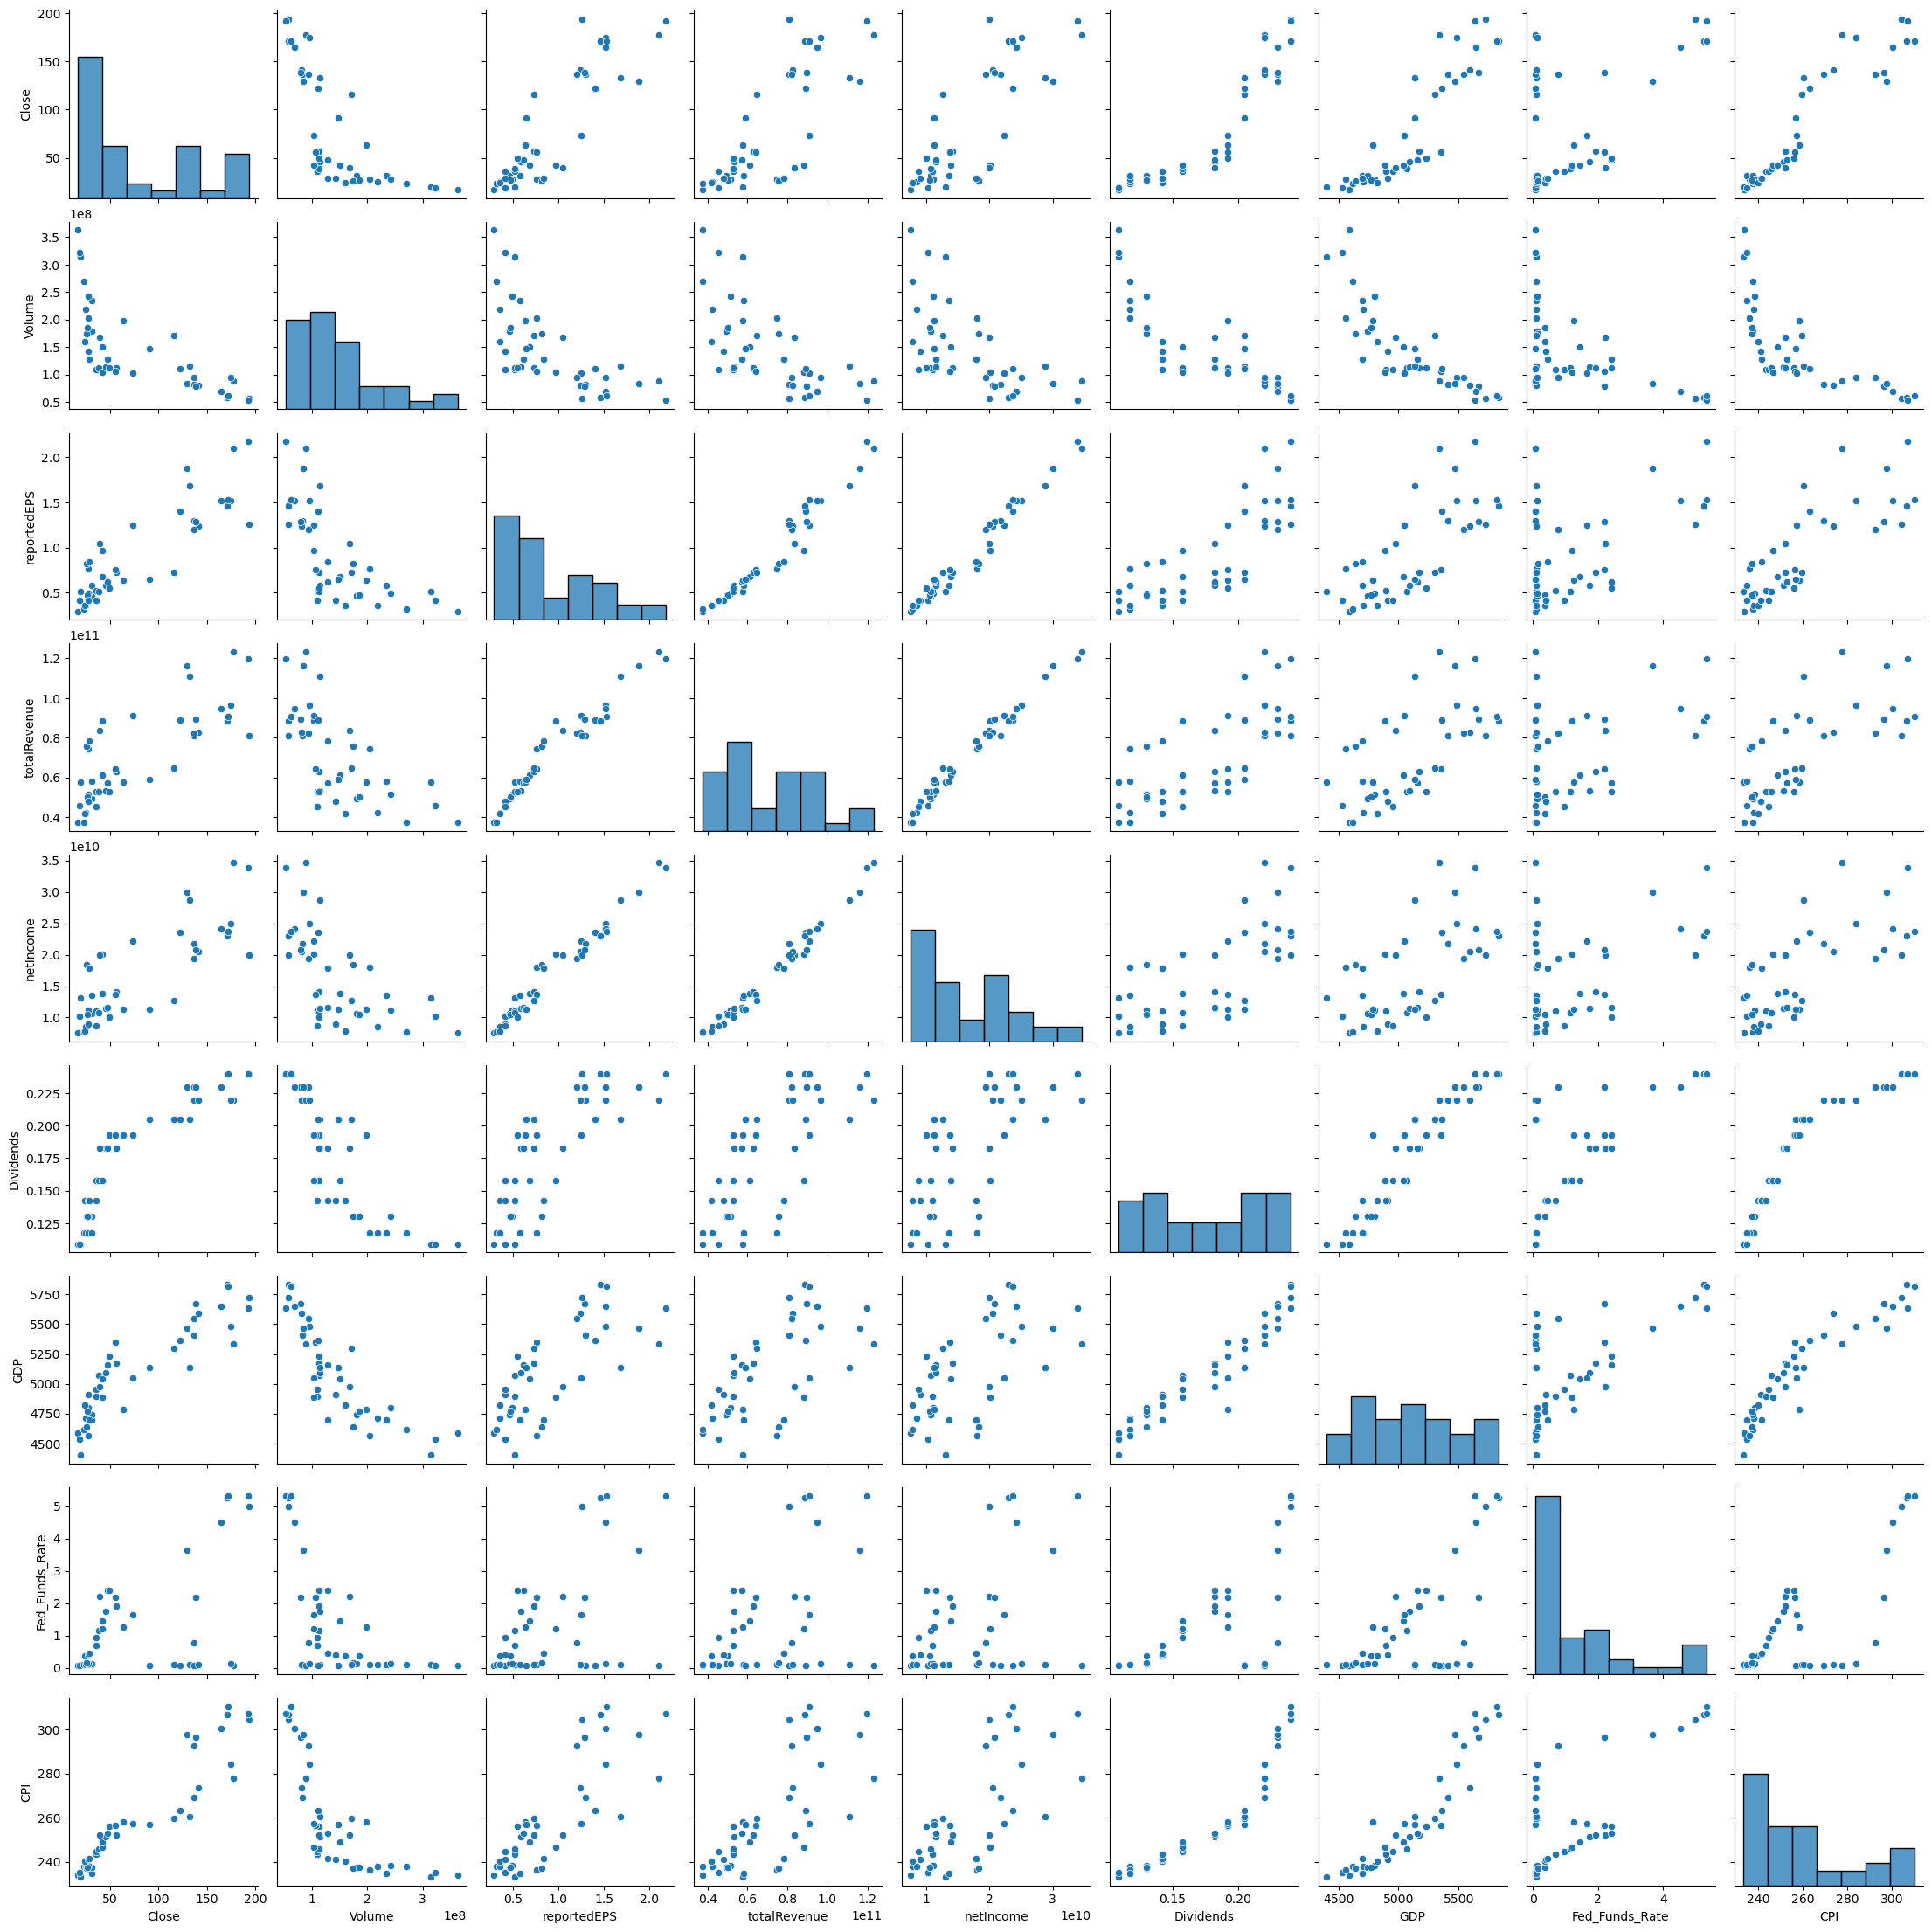

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(apple_df)
plt.show()

__Observations__

We see that almost all variables are positively correlated with respect to the *close price*, except (and * not surprisingly*) volume. It is not surpiring, at least to me, because we are looking at the data for Apple stock and Investor Confidence in the stock and his behaviour plays a role here. Investors might be holding onto their shares, expecting the stock price to continue rising. This reduced selling activity can lead to lower trading volumes.

Even though I said that *all variables are positively correlated*, I said it imprecisely because without mentioning the intensity of positive correlation. For instance, even though Fed Funds rate is positive related to close price, it is not related in a strong sense (no clear pattern). To see the intensities of correlation, I have plotted the correlation heatmap below.

One remark: Even though a high (or better rising) interest rate and CPI can mean that the economy might be struggling, this does not neccesarily translated into a negative effect (or negative correlation if we talk about mathematical relationships) on the closing stock price across quarters. This is surprising and teaches us that there is no inherent way to interpret what precisely **causes** changes in stock prices due to numerous interpretations. Example: Even though increasing CPI means that consumers real income is negatively affected, which consequently can effect the comapany profitability (and ultimately stock price), another way to look at it can be that because CPI is increasing, so did stock price through chains of increasing in selling prices of commodoties, increase in revenue ..... and ultimately stock price. 

This shows that the stock market is extremely complex and an increase or decrease of some indicator or predictor variable can affect the stock price in completely different way in any two different quarters for example. I will motivate this with an example of how stock prices for many tech companies exploded and continued to rise despite widespread fear of recessions in 2022-2023 and rising interest rates.

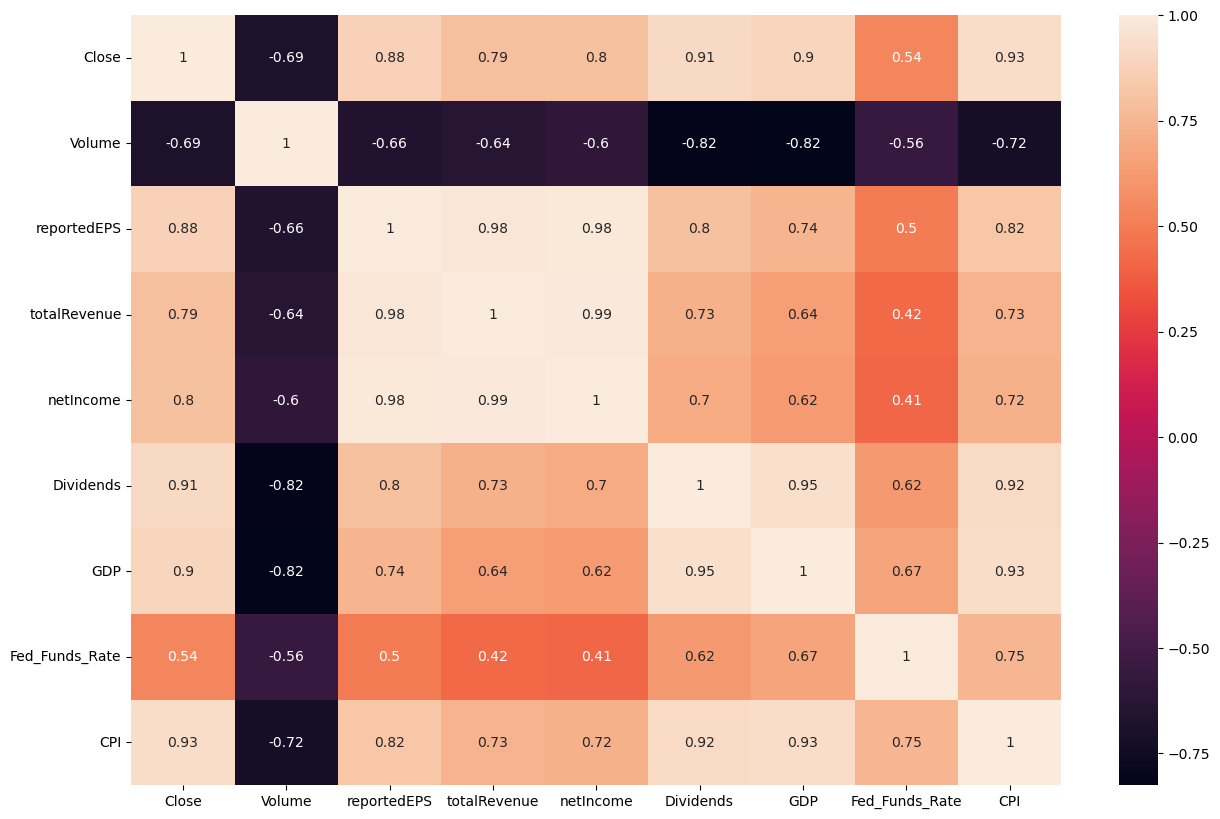

In [62]:
matrix = apple_df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(matrix, annot = True)
plt.show()

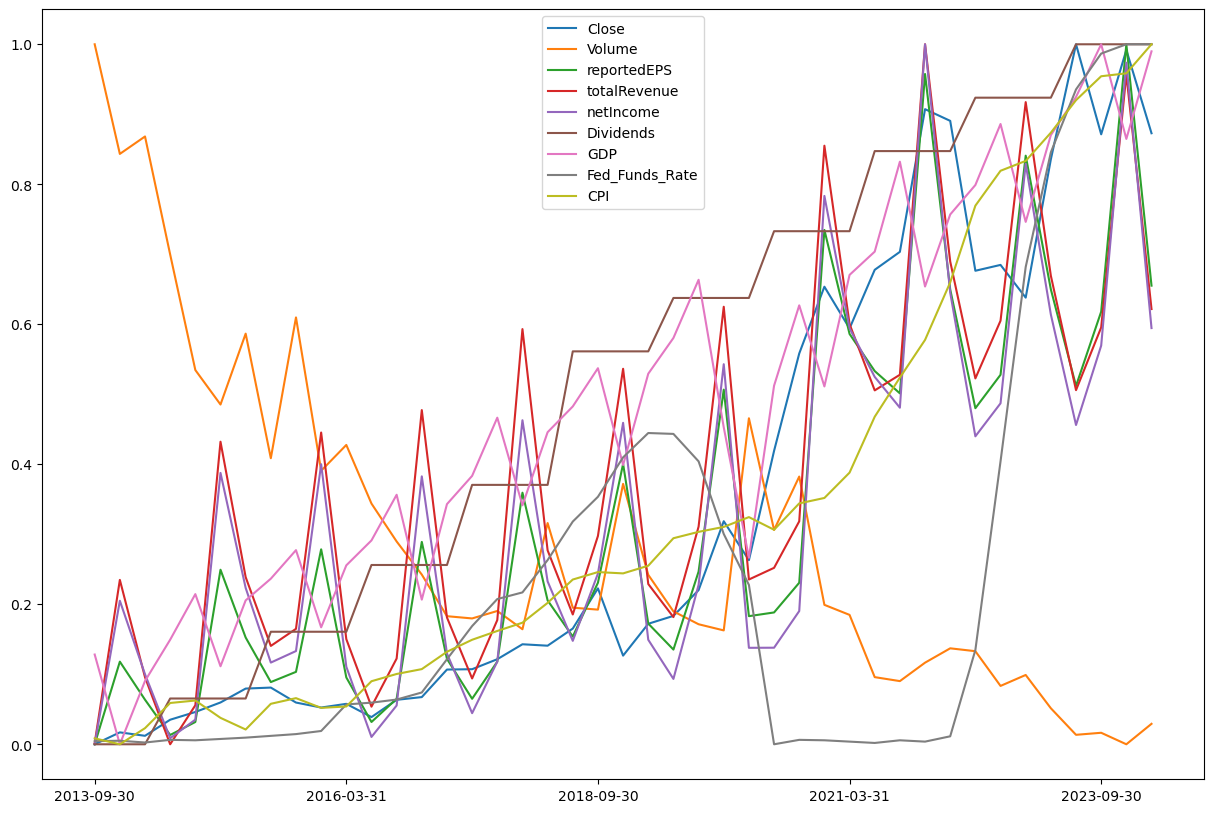

In [63]:
# lets normalise these values so that we can plot them on the same graph for comparison across time
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(apple_df)
scaled_df = pd.DataFrame(scaled_data, columns = apple_df.columns, index = apple_df.index)

plt.figure(figsize = (15, 10))
scaled_df.plot(ax = plt.gca())
plt.show()


Pretty Volatile and Complex right? All variables are increasing in trend across time except except volume (which kept decreasing) and fed funds rate (which increased, then decreased, and then spiked again).

---
Before going towards feature engineering, we can move on to the model building phase. The purpose to do modelling now is that we can compare if our feature engineering can get us any better with results, for we have already talked enough that adding more variables does not neccessarily guarantee that we will be able to predict *__stock price changes accurately__*. 

However, we have to keep in mind that stock market data is highly volatile and unpredictable due to the presence of many factors that can influence the stock prices and can't be captured by the ML models - for example market sentiment and many other factors related to environmental, micro, and macroeconomic factors, that we have not taken into account, are in constant interplay to affect stock prices.

We initiated this project with quite optimism but quickly learned that the stock market is not as predictable as we thought and in pratice, Machine Learning models are not very effective in predicting stock prices. However, for the sake of learning and practice, we will proceed with the applying some models to the data and evaluate their performance.  

Now, that we have outlined the potential challenges, we have to make a naive benchmark model to compare the performance of the other models. The naive benchmark is often based on the random walk model.

# Random Walk Model

A Random Walk model assumes that the next value of a time series is the current value plus a random fluctuation. It's a simple yet effective baseline model for financial time series like stock prices.

For a stock price series $P_t$:

$$P_{t+1} = P_t + \epsilon_t$$

Where:
* $P_{t+1}$ is the Next value in the series
* $P_t$ is the Current value
* $\epsilon_t$ is the Random noise (assumed to follow a normal distribution with mean 0)

For relative changes: 

$$\Delta P_{t+1} = P_{t+1} - P_t = \epsilon_t$$

This means that The next price $P_{t+1}$ depends only on the current price $P_t$, making the process "memoryless."

In [64]:
import numpy as np
# merge all datasets into one dataframe - apple_df. concat along the columns axis.
apple_walk = pd.concat([apple_stock_df, apple_earnings_df, apple_income_statement_df, apple_dividends_df], axis = 1)
# we will now make the datatypes to numeric (float) all together
apple_walk = apple_walk.astype(float)

apple_walk["Close_next_quarter_real"] = apple_walk["Close"].shift(-1)
apple_walk["Close_next_quarter_prediction"] = apple_walk["Close"] + np.random.normal(0, 4, len(apple_walk)) # $4 error
apple_walk["relative_Close_next_quarter_change_real"] = apple_walk["Close_next_quarter_real"].pct_change()
apple_walk["relative_Close_next_quarter_change_prediction"] = apple_walk["Close_next_quarter_prediction"].pct_change()

apple_walk.dropna(inplace = True)

apple_walk.head()

/var/folders/zh/2l0pp8jn6kd80mywh4f4vlmr0000gn/T/ipykernel_8254/966537796.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  apple_walk["relative_Close_next_quarter_change_real"] = apple_walk["Close_next_quarter_real"].pct_change()


,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,Close_next_quarter_real,Close_next_quarter_prediction,relative_Close_next_quarter_change_real,relative_Close_next_quarter_change_prediction
2013-12-31,20.036428,3.143794e+08,0.5175,5.751000e+10,1.307200e+10,0.108929,19.169287,19.129985,-0.043278,0.219954
2014-03-31,19.169287,3.220987e+08,0.4150,4.556100e+10,1.022300e+10,0.108929,23.232500,20.931999,0.211965,0.094198
2014-06-30,23.232500,2.698170e+08,0.3200,3.733200e+10,7.748000e+09,0.117500,25.187500,25.845191,0.084149,0.234722
2014-09-30,25.187500,2.186614e+08,0.3550,4.212300e+10,8.467000e+09,0.117500,27.594999,23.330389,0.095583,-0.097303
2014-12-31,27.594999,2.033927e+08,0.7650,7.446800e+10,1.802400e+10,0.117500,31.107500,27.457623,0.127288,0.176904


In [65]:
np.random.seed(42)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# our model follows the following structure: prediction = current relative_close_change_from_the_last_quarter + random noise ~ N(0, 4)
actuals = apple_walk["Close_next_quarter_real"].values
predictions = apple_walk["Close_next_quarter_prediction"].values


# evaluate the model
rmse = mean_squared_error(actuals, predictions, squared=False)
mae = mean_absolute_error(actuals, predictions)
r2 = r2_score(actuals, predictions)

# Accuracy: if the actuals are positive and the predictions are positive,
# or if the actuals are negative and the predictions are negative, then the prediction is correct.
# Count the number of correct predictions
correct_predictions = np.sum(np.sign(apple_walk["relative_Close_next_quarter_change_real"].values) == np.sign(apple_walk["relative_Close_next_quarter_change_prediction"].values))
total_predictions = len(actuals)
accuracy = correct_predictions / total_predictions

# Print results
# print first 5 predictions
print(f"Predictions: {predictions[:5]}")
# print first 5 real values
print(f"Actuals: {actuals[:5]}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Predictions: [19.12998485 20.93199858 25.84519125 23.33038881 27.4576227 ]
Actuals: [19.16928673 23.23250008 25.1875     27.59499931 31.10750008]
RMSE: 15.66
MAE: 11.28
R2: 0.93
Accuracy: 0.51


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##### Interpreation of the results:

__RMSE__ has not a meaningful interpreation in our context but __MAE__ shows that we, on average were 10$ away from the true value (in absolute value)

__R2__: The R2 value is 0.93. This value measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). The higher the value, the better the model. In this case, the value shows that the model is surprisinly appropriate for the data and captures well the movements (variation) in the target variable.

__Accuracy__: The accuracy value is 0.46. This value measures the proportion of correct predictions. The higher the value, the better the model. In this case, the value is 0.46 - which is even below a random guess of flipping a fair coin and betting whether to buy the stock or not!

These results will serve as a naive baseline for the ML models that we will build.

---

Now, we will implement the following models for this dataset: Logistic Regression, Linear Regression (for the sake of example only), S.V.M, Random Forest, and LSTM.

# Logistic Regression - No Feature Engineering

There is no way Logistic Regression can fit a squiggly line and separate the two **accurately**! However, we will see that even if it is not accurate, it does pretty well for w.r.t other models.

In [66]:
apple_log_reg = apple_df.copy()

In [67]:
# we will create a new column called "close_next_quarter" which will be the closing price of the next quarter
apple_log_reg["close_next_quarter"] = apple_log_reg["Close"].shift(-1)
# we will create a new column called "relative_change_in_close_next_quarter" which will be the relative change in the closing price of the next quarter
apple_log_reg["relative_change_in_close_next_quarter"] = (apple_log_reg["close_next_quarter"] - apple_log_reg["Close"]) / apple_log_reg["Close"]
# we will create a new column called "Buy" which will be 1 if the relative change in the closing price of the next quarter is positive, and 0 otherwise
apple_log_reg["Buy"] = (apple_log_reg["relative_change_in_close_next_quarter"] > 0).astype(int) # our target variable
apple_log_reg.head()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI,close_next_quarter,relative_change_in_close_next_quarter,Buy
2013-09-30,17.026787,3.629280e+08,0.2950,3.747200e+10,7.512000e+09,0.108929,4586.321,0.083333,233.874000,20.036428,0.176759,1
2013-12-31,20.036428,3.143794e+08,0.5175,5.751000e+10,1.307200e+10,0.108929,4403.178,0.086667,233.221333,19.169287,-0.043278,0
2014-03-31,19.169287,3.220987e+08,0.4150,4.556100e+10,1.022300e+10,0.108929,4532.342,0.073333,234.996667,23.232500,0.211965,1
2014-06-30,23.232500,2.698170e+08,0.3200,3.733200e+10,7.748000e+09,0.117500,4616.610,0.093333,237.771667,25.187500,0.084149,1
2014-09-30,25.187500,2.186614e+08,0.3550,4.212300e+10,8.467000e+09,0.117500,4709.584,0.090000,238.044333,27.594999,0.095583,1


In [68]:
# drop the rows with missing values
apple_log_reg.dropna(inplace = True)
# drop the columns "close_next_quarter" and "relative_change_in_close_next_quarter" because they are were intermediate columns for the target variable
apple_log_reg.drop(columns = ["close_next_quarter", "relative_change_in_close_next_quarter"], inplace = True)

Just to get a sense of what kind of squiggly line we aim to fit in, we will plot the points:

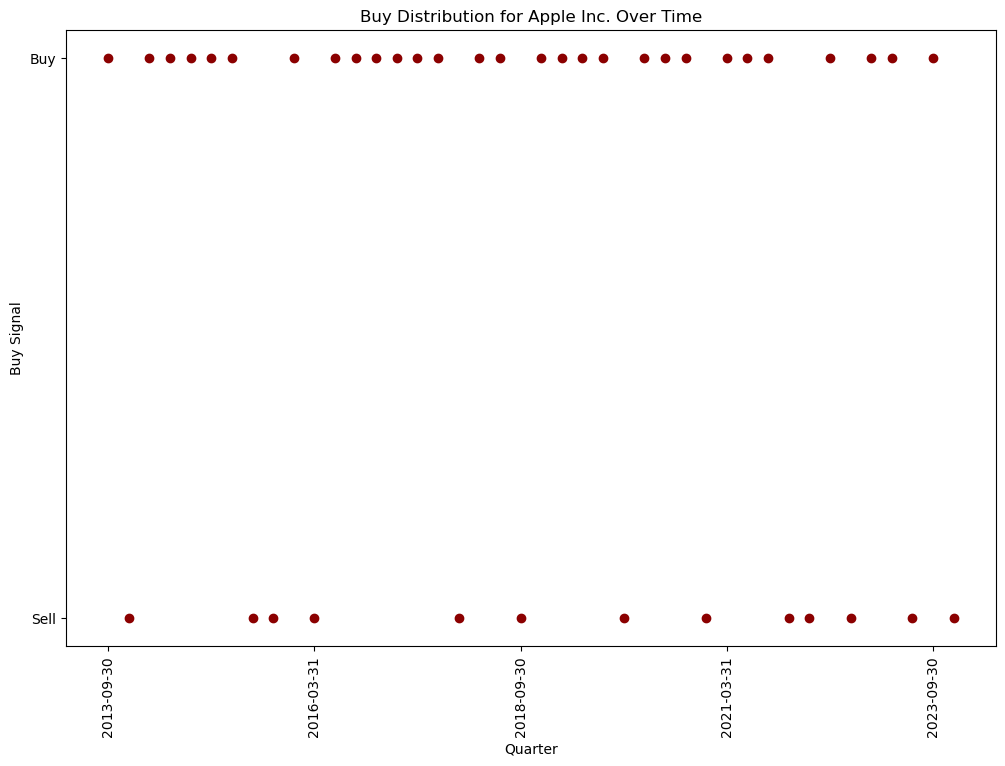

In [69]:
# we will plot the Buy column across the quarters as points
fig, ax = plt.subplots(figsize=(12, 8))
apple_log_reg["Buy"].plot(ax=ax, marker="o", linestyle="", color="darkred")
ax.set_title("Buy Distribution for Apple Inc. Over Time", color='black')
ax.set_ylabel("Buy Signal", color='black')
ax.set_xlabel("Quarter", color='black')
ax.set_yticks([0, 1])
ax.set_yticklabels(["Sell", "Buy"])
# rotate the x-axis labels
plt.xticks(rotation=90);

Seems like our results ain't going to be much accurate.

We will now proceed with normalisation of the data and then fitting the logistic regression model!

In [70]:
from sklearn.preprocessing import StandardScaler

cols = [col for col in apple_log_reg.columns if col != "Buy"]
scaler = StandardScaler()
apple_log_reg[cols] = scaler.fit_transform(apple_log_reg[cols])

training_set = apple_log_reg[apple_log_reg.index < "2021-12-31"]
testing_set = apple_log_reg[apple_log_reg.index >= "2021-12-31"]

X_train = training_set.drop(columns=["Buy"])
y_train = training_set["Buy"]
X_test = testing_set.drop(columns=["Buy"])
y_test = testing_set["Buy"]

In [71]:
class_frequencies = apple_log_reg['Buy'].value_counts(normalize=True)
inverse_class_frequencies = 1 /  class_frequencies
inverse_class_frequencies_dict = inverse_class_frequencies.to_dict()

Accuracy: 0.67
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.57      1.00      0.73         4

    accuracy                           0.67         9
   macro avg       0.79      0.70      0.65         9
weighted avg       0.81      0.67      0.64         9



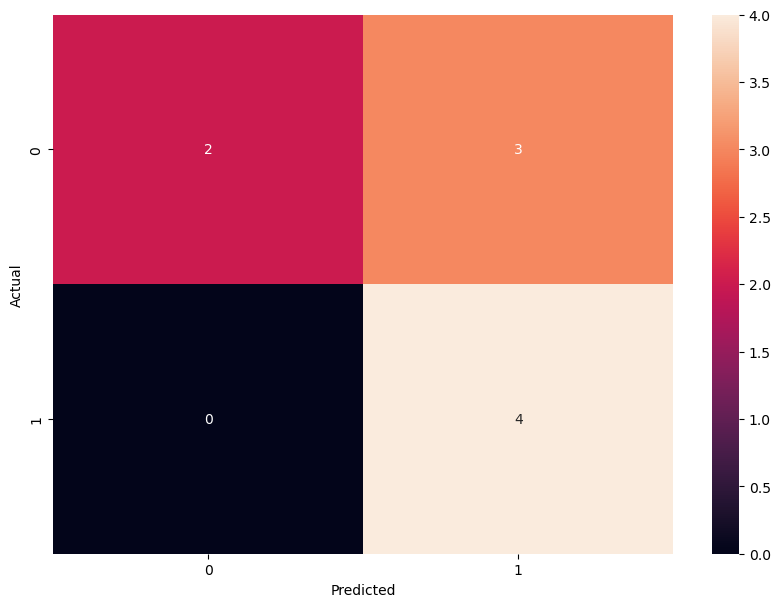

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.model_selection import GridSearchCV

# Create a logistic regression model
log_reg = LogisticRegression(penalty='l2', C=0.95)

# Fit the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Use sns heatmap to plot the confusion matrix
plt.figure(figsize = (10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### One time definitions for important metrics:  

> **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: "Of all the instances that were predicted as positive, how many were actually positive?"
   $$
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  $$
---
> **Recall (Sensitivity or True Positive Rate)**: Recall is the ratio of correctly predicted positive observations to all the observations in the actual class. It answers the question: "Of all the instances that were actually positive, how many were correctly predicted as positive?"
   $$
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $$
---
> **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall.
   $$
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$
---
> **Accuracy**: Accuracy is the ratio of correctly predicted observations to the total observations. It answers the question: "How often is the classifier correct?"
   $$
   \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Observations}}
  $$

### Interpretation:


Model is, not surprisingly, more accurate then the naive benchmark, with accuracy of 67%. However, as outlined in the start of the project, what matters most to us is the recall for class 0, which helps us avoid risk. We see that Logistic Regression gives us a Recall of 0.4, i.e. of all the instances that were actually negative, our model only predicted 40% of them correctly, which is pretty risky. This also shows that the model is predicting positive for some cases, even if in reality the return is negative (thus precision of 57% for class 1 (Buy))

# Linear Regression (with Regularization) - No Feature Engineering

In [73]:
apple_linear_reg = apple_df.copy()

In [74]:
# we will create a new column called "close_next_quarter" which will be the closing price of the next quarter
apple_linear_reg["close_next_quarter"] = apple_linear_reg["Close"].shift(-1)
# we will create a new column called "relative_change_in_close_next_quarter" which will be the relative change in the closing price of the next quarter
# This will be our target variable
apple_linear_reg["relative_change_in_close_next_quarter"] = (apple_linear_reg["close_next_quarter"] - apple_linear_reg["Close"]) / apple_linear_reg["Close"]
apple_linear_reg.head()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI,close_next_quarter,relative_change_in_close_next_quarter
2013-09-30,17.026787,3.629280e+08,0.2950,3.747200e+10,7.512000e+09,0.108929,4586.321,0.083333,233.874000,20.036428,0.176759
2013-12-31,20.036428,3.143794e+08,0.5175,5.751000e+10,1.307200e+10,0.108929,4403.178,0.086667,233.221333,19.169287,-0.043278
2014-03-31,19.169287,3.220987e+08,0.4150,4.556100e+10,1.022300e+10,0.108929,4532.342,0.073333,234.996667,23.232500,0.211965
2014-06-30,23.232500,2.698170e+08,0.3200,3.733200e+10,7.748000e+09,0.117500,4616.610,0.093333,237.771667,25.187500,0.084149
2014-09-30,25.187500,2.186614e+08,0.3550,4.212300e+10,8.467000e+09,0.117500,4709.584,0.090000,238.044333,27.594999,0.095583


In [75]:
apple_linear_reg.dropna(inplace = True)
apple_linear_reg.drop(columns = ["close_next_quarter"], inplace = True)

We will now proceed with normalisation of the data and then fitting the Linear regression model!

In [76]:
from sklearn.preprocessing import StandardScaler

cols = [col for col in apple_linear_reg.columns if col != "relative_change_in_close_next_quarter"]
scaler = StandardScaler()
apple_linear_reg[cols] = scaler.fit_transform(apple_linear_reg[cols])

training_set = apple_linear_reg[apple_linear_reg.index < "2021-12-31"]
testing_set = apple_linear_reg[apple_linear_reg.index >= "2021-12-31"]

X_train = training_set.drop(columns=["relative_change_in_close_next_quarter"])
y_train = training_set["relative_change_in_close_next_quarter"]
X_test = testing_set.drop(columns=["relative_change_in_close_next_quarter"])
y_test = testing_set["relative_change_in_close_next_quarter"]

Predictions: [-0.02039149  0.16512292  0.52125725  0.41910656  0.28851891]
Actuals: [-0.01666952 -0.21699788  0.01082501 -0.05984084  0.26914495]
MSE: 0.07
MAE: 0.18
R2: -2.37
Accuracy: 0.78
              precision    recall  f1-score   support

        -1.0       1.00      0.60      0.75         5
         1.0       0.67      1.00      0.80         4

    accuracy                           0.78         9
   macro avg       0.83      0.80      0.78         9
weighted avg       0.85      0.78      0.77         9



<Axes: >

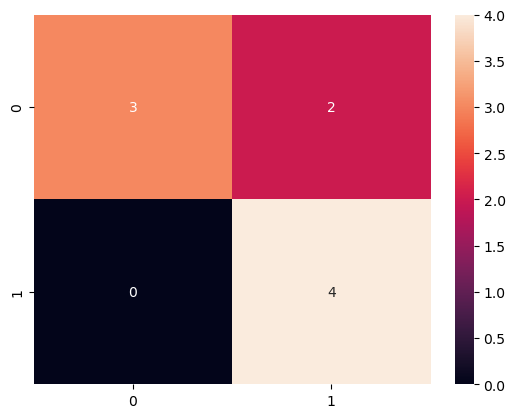

In [ ]:
from sklearn.linear_model import Ridge
# import the metrics for Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a linear regression model
lin_reg = Ridge(alpha=.2)

# Fit the model
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# print first 5 predictions and actuals
print(f"Predictions: {y_pred[:5]}")
print(f"Actuals: {y_test[:5].values}")

# Print the results
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

# Calculate the accuracy by considering the sign of the predicted and actual values
correct_predictions = np.sum(np.sign(y_test) == np.sign(y_pred))
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")

# print the classification report
print(classification_report(np.sign(y_test), np.sign(y_pred)))
sns.heatmap(confusion_matrix(np.sign(y_test), np.sign(y_pred)), annot = True, fmt = 'd')

### Interpretation:

Model is, not surprisingly, more accurate then the naive benchmark, with a whopping accuracy of 78%. However, as outlined in the start of the project, what matters most to us is the recall for class 0 (-1), which helps us avoid risk. We see that Linear Regression gives us a Recall of 0.6, i.e. of all the instances that were actually negative, our model only predicted 60% of them correctly, which is seems reasonable. This also shows that the model is predicting positive for some cases, even if in reality the return is negative (thus precision of 67% for class 1 (+1))

# Support Vector Machines - No Feature Engineering

In [78]:
apple_svm = apple_log_reg.copy()

In [79]:
apple_svm.head()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI,Buy
2013-09-30,-1.034918,2.954330,-1.214905,-1.437494,-1.252309,-1.538936,-1.326277,-0.748680,-1.069921,1
2013-12-31,-0.982350,2.291888,-0.768452,-0.556989,-0.475665,-1.538936,-1.816927,-0.746485,-1.098802,0
2014-03-31,-0.997496,2.397216,-0.974122,-1.082049,-0.873625,-1.538936,-1.470890,-0.755264,-1.020243,1
2014-06-30,-0.926526,1.683835,-1.164742,-1.443646,-1.219343,-1.339786,-1.245131,-0.742095,-0.897449,1
2014-09-30,-0.892380,0.985821,-1.094513,-1.233121,-1.118910,-1.339786,-0.996049,-0.744290,-0.885383,1


In [80]:
training_set = apple_log_reg[apple_log_reg.index < "2021-12-31"]
testing_set = apple_log_reg[apple_log_reg.index >= "2021-12-31"]

X_train = training_set.drop(columns=["Buy"])
y_train = training_set["Buy"]
X_test = testing_set.drop(columns=["Buy"])
y_test = testing_set["Buy"]

Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.60      0.75      0.67         4

    accuracy                           0.67         9
   macro avg       0.68      0.68      0.67         9
weighted avg       0.68      0.67      0.67         9



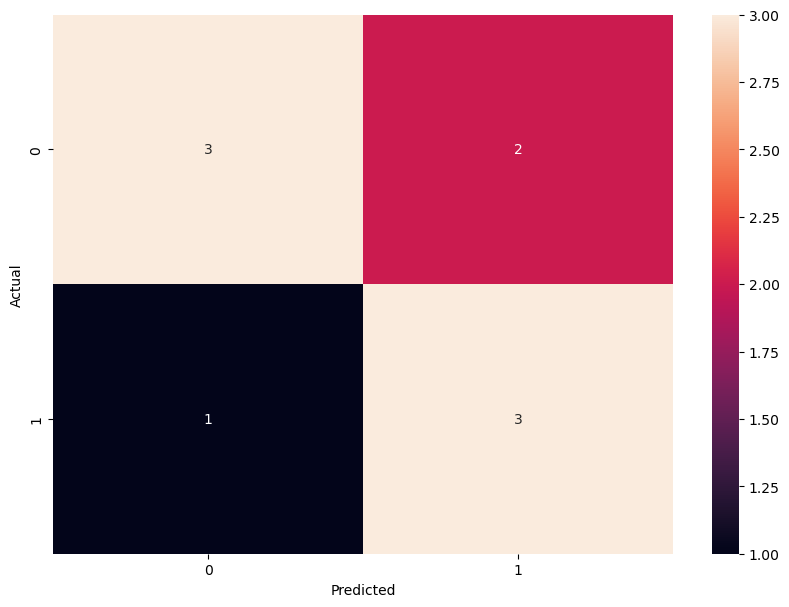

In [81]:
from sklearn.svm import SVC

# Create a support vector machine model
svm = SVC(class_weight='balanced', kernel='rbf', C=2, gamma=.02)

# Fit the model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Use sns heatmap to plot the confusion matrix
plt.figure(figsize = (10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Interpretation:


Model, is not surprisingly, more accurate then the naive benchmark, with accuracy of 67%. However, as outlined in the start of the project, what matters most to us is the recall for class 0, which helps us avoid risk. We see that SVM gives us a Recall of 0.6, i.e. of all the instances that were actually negative, our model only predicted 60% of them correctly, which is pretty reasonable. The recall score is better than Logistic Regression. Recall score of 60% also shows that the model is predicting positive return for some cases, even if in reality the return is negative (thus precision of 60% for class 1 (Buy))

---
# LSTM - Doubts

In [82]:
apple_svm.head()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI,Buy
2013-09-30,-1.034918,2.954330,-1.214905,-1.437494,-1.252309,-1.538936,-1.326277,-0.748680,-1.069921,1
2013-12-31,-0.982350,2.291888,-0.768452,-0.556989,-0.475665,-1.538936,-1.816927,-0.746485,-1.098802,0
2014-03-31,-0.997496,2.397216,-0.974122,-1.082049,-0.873625,-1.538936,-1.470890,-0.755264,-1.020243,1
2014-06-30,-0.926526,1.683835,-1.164742,-1.443646,-1.219343,-1.339786,-1.245131,-0.742095,-0.897449,1
2014-09-30,-0.892380,0.985821,-1.094513,-1.233121,-1.118910,-1.339786,-0.996049,-0.744290,-0.885383,1


In [83]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import classification_report

torch.manual_seed(42)

batch_size = 4  # Smaller batch size for a small dataset

# Define the target and features
target = "Buy"  # Binary classification target: Buy (1) or Not (0) for the next quarter
features = [col for col in apple_svm.columns if col != target]

# Convert the data into sequences for LSTM input
def create_sequences(data, seq_length=4):
    if len(data) <= seq_length:
        raise ValueError("Not enough data to create even one sequence.")
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i+seq_length][features].values
        label = data.iloc[i+seq_length][target]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Create sequences
X, y = create_sequences(apple_svm, seq_length=4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for training and testing sets
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [84]:
# LSTM Model
class LSTM_Model(nn.Module):
    def __init__(self, input_size, hidden_layer_size, num_layers, output_size=1):
        super(LSTM_Model, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, 
                            hidden_size=hidden_layer_size, 
                            num_layers=num_layers, 
                            batch_first=True)
        self.fc = nn.Linear(hidden_layer_size, output_size)
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]  # Only the output of the last time step
        predictions = self.fc(lstm_out)
        return predictions

In [85]:
# Model hyperparameters
input_size = len(features)  # Number of features
hidden_layer_size = 32
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 20

# Model instantiation
model = LSTM_Model(input_size=input_size, hidden_layer_size=hidden_layer_size, output_size=output_size, num_layers=num_layers)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Correct loss function for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)  # Model forward pass
        loss = criterion(outputs.squeeze(), y_batch)  # Squeeze to match shapes
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Testing the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted = (torch.sigmoid(outputs.squeeze()) > 0.5).float()  # Apply sigmoid and threshold
    print("Classification Report:")
    print(classification_report(y_test, predicted))

Epoch [1/20], Loss: 0.6777
Epoch [2/20], Loss: 0.6605
Epoch [3/20], Loss: 0.6357
Epoch [4/20], Loss: 0.6311
Epoch [5/20], Loss: 0.6178
Epoch [6/20], Loss: 0.5838
Epoch [7/20], Loss: 0.5664
Epoch [8/20], Loss: 0.5602
Epoch [9/20], Loss: 0.5605
Epoch [10/20], Loss: 0.5579
Epoch [11/20], Loss: 0.5577
Epoch [12/20], Loss: 0.5541
Epoch [13/20], Loss: 0.5874
Epoch [14/20], Loss: 0.5524
Epoch [15/20], Loss: 0.5524
Epoch [16/20], Loss: 0.5850
Epoch [17/20], Loss: 0.5793
Epoch [18/20], Loss: 0.5822
Epoch [19/20], Loss: 0.5489
Epoch [20/20], Loss: 0.5428
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.50      1.00      0.67         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


---

# Feature Engineering

What is __Feature Engineering__?
Feature engineering is the process of using domain knowledge to extract features from existing data to further enhance the information and find patters intermingling with our target variable. These features can be used to improve the performance of machine learning algorithms.

Some features, thanks to our domain knowledge, that we have selected are as follows:

1. **Dividend Yield**: The dividend yield is the annual dividend per share divided by the price per share. It is a financial ratio that shows how much a company pays out in dividends each year relative to its stock price - thus affecting the stock price.
2. **Divident Payout Ratio**: The dividend payout ratio is the ratio of the total amount of dividends paid out to shareholders relative to the net income of the company. It is also calculated as the dividend per share divided by the earnings per share.
3. **Price to Earnings Ratio**: The price to earnings ratio (P/E ratio) is the ratio for valuing a company that measures its current share price relative to its per-share earnings. It is also known as the price multiple or the earnings multiple.
4. **Relative Close change for the next quarter**: The relative Close change for the next quarter is the percentage change in the stock price from the current quarter to the next quarter. This will help us determine whether to buy the stock or not - aiding to determine our target variable
5. **Buy**: If the `relative_Close_change_for_the_next_quarter` is positive, equate 1. Else, - `our target variable`.


In [86]:
# Dividend yield = dividends per share / Market value per share * 100
apple_df["Dividend_Yield"] = apple_df["Dividends"] / apple_df["Close"] * 100

In [87]:
# dividends per share / earnings per share
apple_df["Dividend_payout"] = apple_df["Dividends"] / apple_df["reportedEPS"]

In [88]:
# Price to Earnings ratio = Market value per share / Earnings per share
apple_df["PE_Ratio"] = apple_df["Close"] / apple_df["reportedEPS"]

In [89]:
apple_df.head()

,Close,Volume,reportedEPS,totalRevenue,netIncome,Dividends,GDP,Fed_Funds_Rate,CPI,Dividend_Yield,Dividend_payout,PE_Ratio
2013-09-30,17.026787,3.629280e+08,0.2950,3.747200e+10,7.512000e+09,0.108929,4586.321,0.083333,233.874000,0.639751,0.369251,57.717922
2013-12-31,20.036428,3.143794e+08,0.5175,5.751000e+10,1.307200e+10,0.108929,4403.178,0.086667,233.221333,0.543655,0.210491,38.717735
2014-03-31,19.169287,3.220987e+08,0.4150,4.556100e+10,1.022300e+10,0.108929,4532.342,0.073333,234.996667,0.568248,0.262480,46.191053
2014-06-30,23.232500,2.698170e+08,0.3200,3.733200e+10,7.748000e+09,0.117500,4616.610,0.093333,237.771667,0.505757,0.367187,72.601562
2014-09-30,25.187500,2.186614e+08,0.3550,4.212300e+10,8.467000e+09,0.117500,4709.584,0.090000,238.044333,0.466501,0.330986,70.950704


From now on, we will not use these absolute values but rather consider the percentage change (relative values w.r.t last quarter) for our features. This is because we can make use of seasonality and trends in data, which hopefully LSTM may pick up. Also, some of our columns wilk become stationary. In principle, data should also carry the same information (trends) so it is a reasonble approach!

In [90]:
pct_change = apple_df.pct_change()
pct_change.columns = [f"relative_{col}_change_from_last_quarter" for col in pct_change.columns]
apple_df = pct_change.copy()

In [91]:
# Relative Close change for the next quarter
apple_df["Relative_close_change_for_next_quarter"] = apple_df["relative_Close_change_from_last_quarter"].shift(-1)

# Buy: If the relative_Close_change_for_the_next_quarter is positive, equate 1. Else, equate 0
apple_df["Buy"] = (apple_df["Relative_close_change_for_next_quarter"] > 0).astype(int)

In [92]:
apple_df.dropna(inplace = True)

In [93]:
# Save the final dataframe to a csv file for reuse.
apple_df.to_csv("apple_df.csv")

In [94]:
apple_df.head(3)

,relative_Close_change_from_last_quarter,relative_Volume_change_from_last_quarter,relative_reportedEPS_change_from_last_quarter,relative_totalRevenue_change_from_last_quarter,relative_netIncome_change_from_last_quarter,relative_Dividends_change_from_last_quarter,relative_GDP_change_from_last_quarter,relative_Fed_Funds_Rate_change_from_last_quarter,relative_CPI_change_from_last_quarter,relative_Dividend_Yield_change_from_last_quarter,relative_Dividend_payout_change_from_last_quarter,relative_PE_Ratio_change_from_last_quarter,Relative_close_change_for_next_quarter,Buy
2013-12-31,0.176759,-0.133769,0.754237,0.534746,0.740149,0.000000,-0.039932,0.040008,-0.002791,-0.150208,-0.429952,-0.329190,-0.043278,0
2014-03-31,-0.043278,0.024554,-0.198068,-0.207773,-0.217947,0.000000,0.029334,-0.153853,0.007612,0.045236,0.246988,0.193021,0.211965,1
2014-06-30,0.211965,-0.162316,-0.228916,-0.180615,-0.242101,0.078684,0.018593,0.272729,0.011809,-0.109971,0.398919,0.571767,0.084149,1


# Exploratory Data Analysis

We will start by examining the structure of the our dataset using `.info()` method from pandas and utilize `.describe()` method to get the summary statistics.

The index contains the dates for each quarter starting from 2014 until the end of 2023! We will start by printing the shape of the dataset!

In [95]:
row_number, col_number = apple_df.shape
print(f'The dataset contains \'{row_number}\' rows.')
print(f'The dataset contains \'{col_number}\' columns')

The dataset contains '41' rows.
The dataset contains '14' columns


We have the stock and economic data for 41 quarters for the Apple Inc. and U.S economy!

In [96]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 2013-12-31 to 2023-12-31
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   relative_Close_change_from_last_quarter            41 non-null     float64
 1   relative_Volume_change_from_last_quarter           41 non-null     float64
 2   relative_reportedEPS_change_from_last_quarter      41 non-null     float64
 3   relative_totalRevenue_change_from_last_quarter     41 non-null     float64
 4   relative_netIncome_change_from_last_quarter        41 non-null     float64
 5   relative_Dividends_change_from_last_quarter        41 non-null     float64
 6   relative_GDP_change_from_last_quarter              41 non-null     float64
 7   relative_Fed_Funds_Rate_change_from_last_quarter   41 non-null     float64
 8   relative_CPI_change_from_last_quarter              41 non-null     float64
 9   

All of our columns are numeric in type and there is no missing value!

In [97]:
apple_df = apple_df.round(6)

In [98]:
apple_df.describe()

,relative_Close_change_from_last_quarter,relative_Volume_change_from_last_quarter,relative_reportedEPS_change_from_last_quarter,relative_totalRevenue_change_from_last_quarter,relative_netIncome_change_from_last_quarter,relative_Dividends_change_from_last_quarter,relative_GDP_change_from_last_quarter,relative_Fed_Funds_Rate_change_from_last_quarter,relative_CPI_change_from_last_quarter,relative_Dividend_Yield_change_from_last_quarter,relative_Dividend_payout_change_from_last_quarter,relative_PE_Ratio_change_from_last_quarter,Relative_close_change_for_next_quarter,Buy
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.071772,-0.023370,0.131200,0.072543,0.118091,0.020172,0.005549,0.290415,0.006701,-0.028097,0.045320,0.086375,0.064795,0.682927
std,0.151461,0.234780,0.458356,0.319952,0.453919,0.039647,0.031885,0.920387,0.007937,0.153043,0.390195,0.408342,0.153084,0.471117
min,-0.301231,-0.331249,-0.488000,-0.367753,-0.494109,0.000000,-0.056260,-0.952381,-0.008034,-0.257669,-0.565476,-0.514190,-0.301231,0.000000
25%,-0.016670,-0.163313,-0.206009,-0.180615,-0.217947,0.000000,-0.031256,-0.002774,0.002226,-0.127214,-0.304762,-0.238250,-0.043278,0.000000
50%,0.084149,-0.069828,0.015625,0.024880,0.000356,0.000000,0.014140,0.107485,0.004194,-0.042875,0.048387,0.083139,0.070129,1.000000
75%,0.176759,0.030378,0.438356,0.300406,0.413451,0.000000,0.027544,0.236314,0.011724,0.050250,0.351852,0.358549,0.176289,1.000000
max,0.434583,0.908953,1.301370,0.767870,1.268997,0.158730,0.073387,5.416667,0.029738,0.431089,0.953125,1.039365,0.434583,1.000000


<Axes: xlabel='relative_Dividends_change_from_last_quarter'>

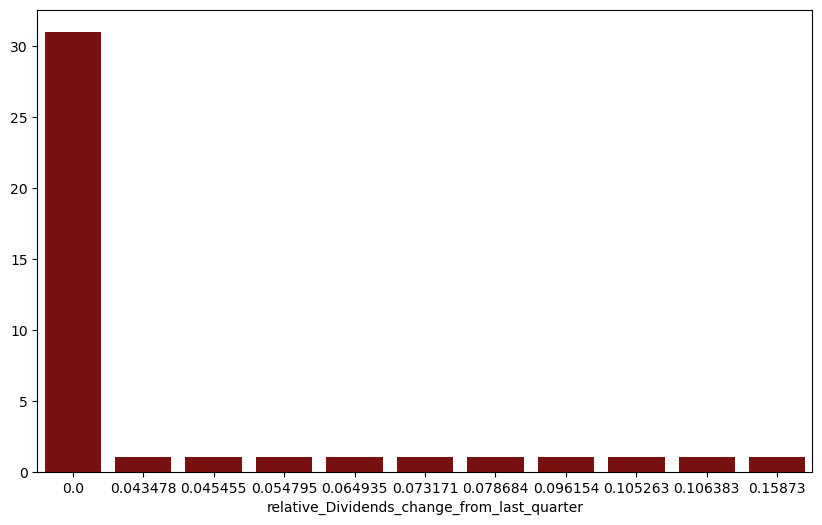

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
# from eyeballing the summary statistics, we can see that `relative_Dividends_change_from_last_quarter` has a little to no variation for the entire dataset and most of the values are 0.0. We can drop this column. However, to motivate the decision, we will plot the distribution of the column.
rel_dividends_count = apple_df["relative_Dividends_change_from_last_quarter"].value_counts()
plt.figure(figsize = (10, 6))
sns.barplot(x = rel_dividends_count.index, y = rel_dividends_count.values, color="darkred")

In [100]:
apple_df.drop(columns = "relative_Dividends_change_from_last_quarter", inplace = True)

**Univariate Analysis**

We can visualise some of the important features by plotting them time (quarters) and observe their tendencies!

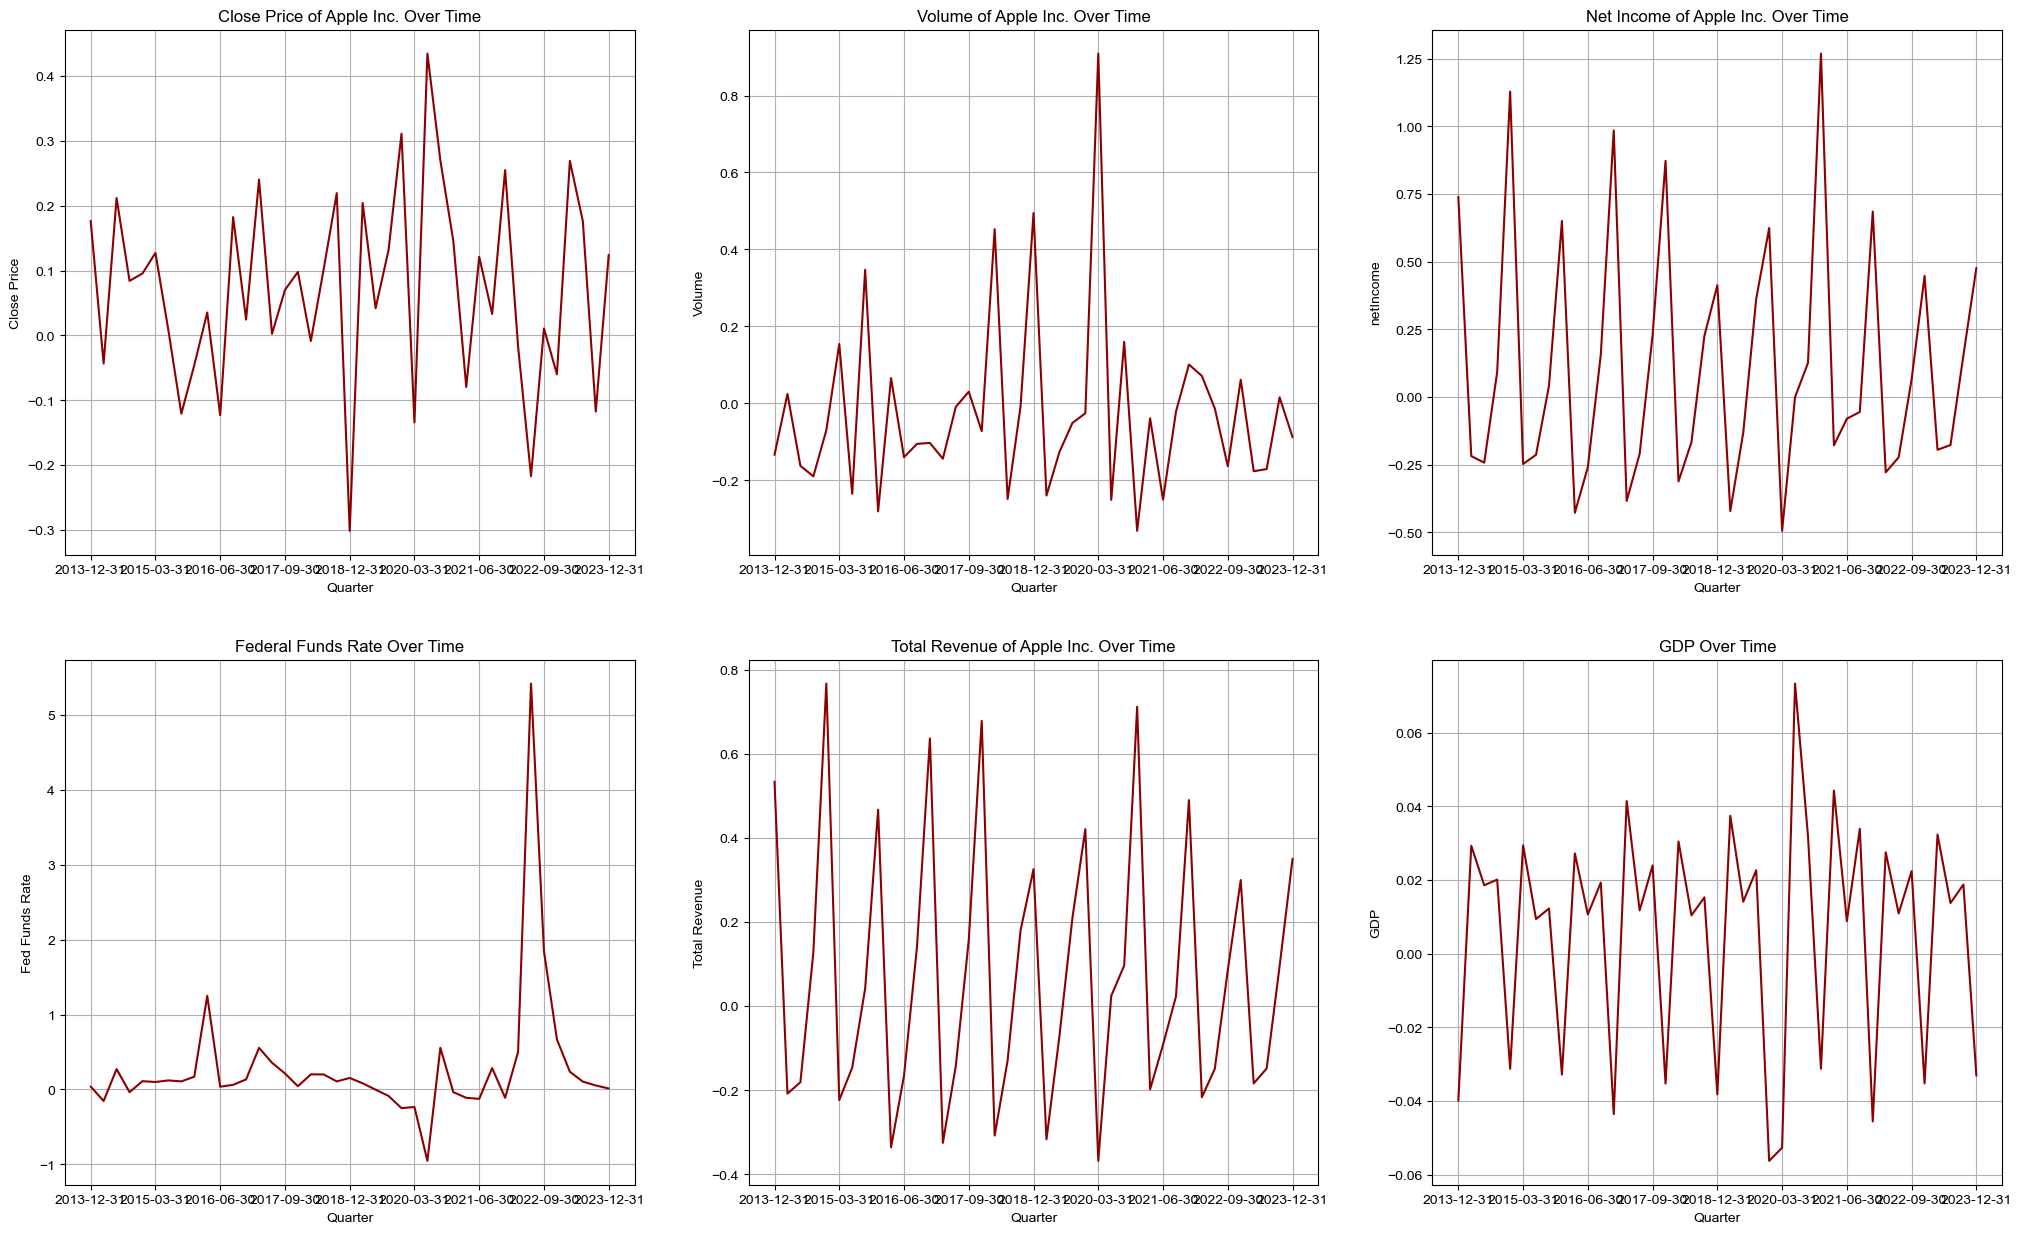

In [101]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))
sns.set_style("whitegrid")

apple_df["relative_Close_change_from_last_quarter"].plot(ax=axes[0, 0], color="darkred")
axes[0, 0].set_title("Close Price of Apple Inc. Over Time", color='black')
axes[0, 0].set_ylabel("Close Price", color='black')
axes[0, 0].set_xlabel("Quarter", color='black')

apple_df["relative_Volume_change_from_last_quarter"].plot(ax=axes[0, 1], color="darkred")
axes[0, 1].set_title("Volume of Apple Inc. Over Time", color='black')
axes[0, 1].set_ylabel("Volume", color='black')
axes[0, 1].set_xlabel("Quarter", color='black')

apple_df["relative_netIncome_change_from_last_quarter"].plot(ax=axes[0, 2], color="darkred")
axes[0, 2].set_title("Net Income of Apple Inc. Over Time", color='black')
axes[0, 2].set_ylabel("netIncome", color='black')
axes[0, 2].set_xlabel("Quarter", color='black')

apple_df["relative_Fed_Funds_Rate_change_from_last_quarter"].plot(ax=axes[1, 0], color="darkred")
axes[1, 0].set_title("Federal Funds Rate Over Time", color='black')
axes[1, 0].set_ylabel("Fed Funds Rate", color='black')
axes[1, 0].set_xlabel("Quarter", color='black')

apple_df["relative_totalRevenue_change_from_last_quarter"].plot(ax=axes[1, 1], color="darkred")
axes[1, 1].set_title("Total Revenue of Apple Inc. Over Time", color='black')
axes[1, 1].set_ylabel("Total Revenue", color='black')
axes[1, 1].set_xlabel("Quarter", color='black')

apple_df["relative_GDP_change_from_last_quarter"].plot(ax=axes[1, 2], color="darkred")
axes[1, 2].set_title("GDP Over Time", color='black')
axes[1, 2].set_ylabel("GDP", color='black')
axes[1, 2].set_xlabel("Quarter", color='black')

plt.show()

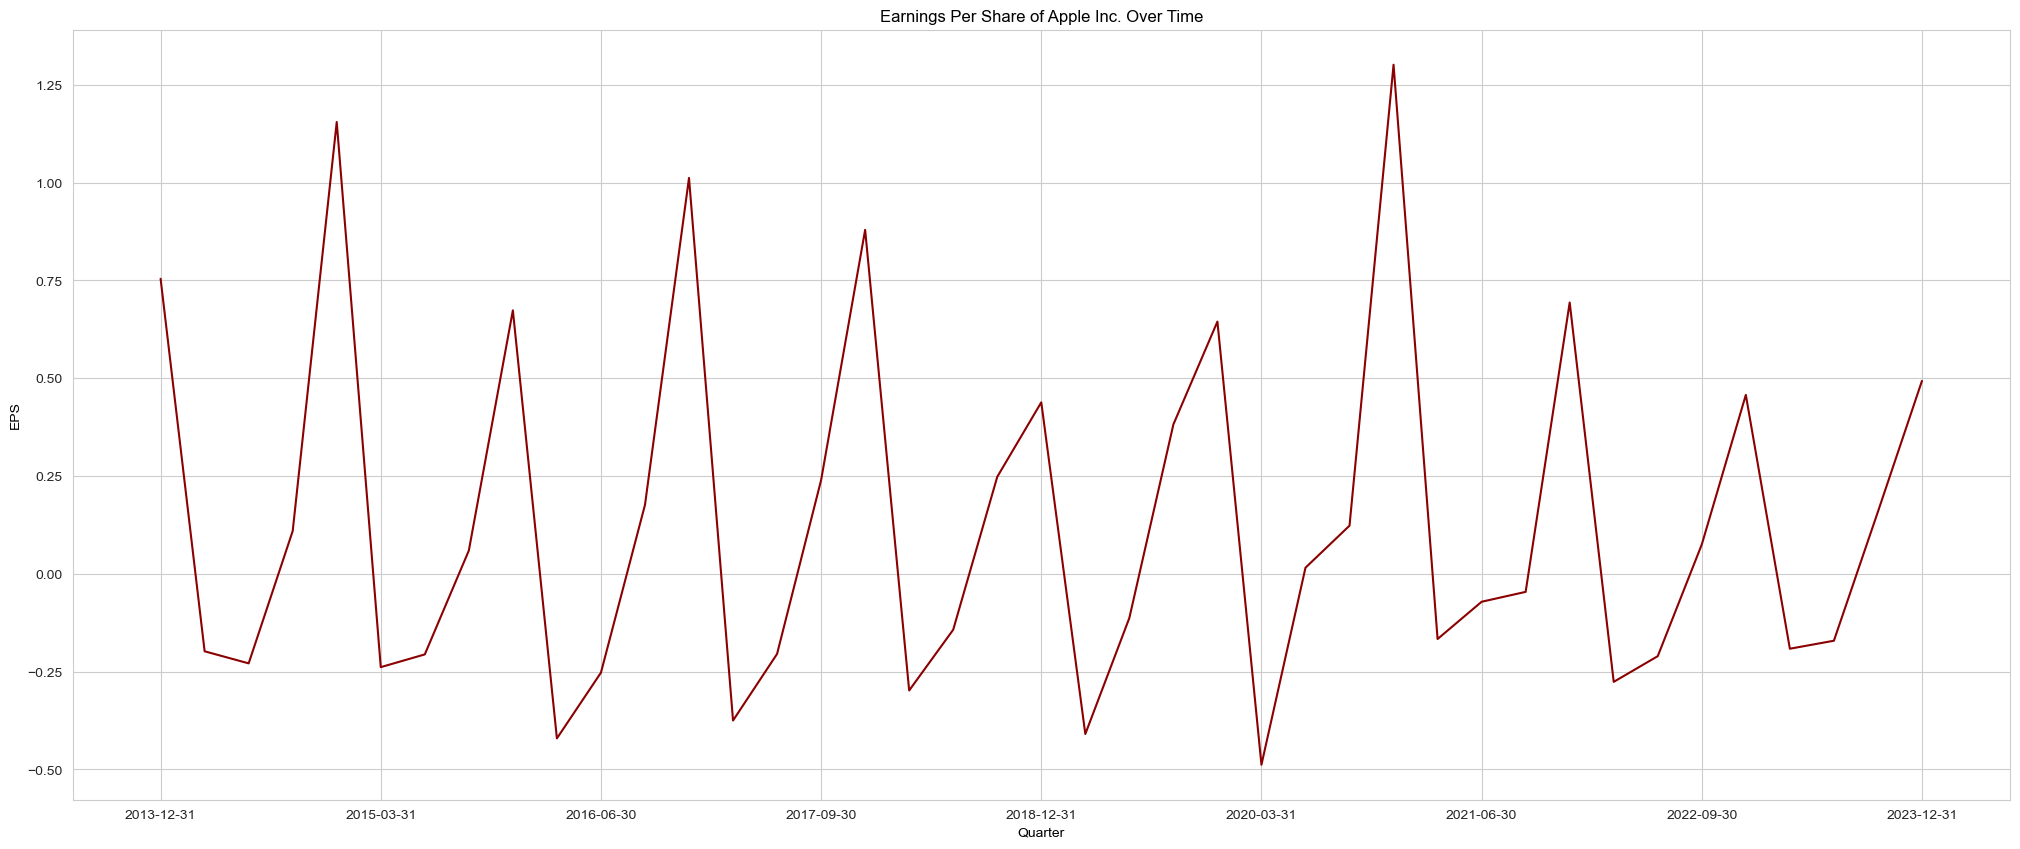

In [102]:
# EPS over time

fig, ax = plt.subplots(figsize=(25, 10))
apple_df["relative_reportedEPS_change_from_last_quarter"].plot(ax=ax, color="darkred")
ax.set_title("Earnings Per Share of Apple Inc. Over Time", color='black')
ax.set_ylabel("EPS", color='black')
ax.set_xlabel("Quarter", color='black')

plt.show()

Obersevations from the plots:

* The Relative change for EPS, Revenue, and Net Income of Apple Inc over time shows a quite distinct pattern. All three variables show that the peak (increase in relative change from the last quarter) in the second quarter and decrease until the last quarter until they finally reach the peak again in the second quarter.
* There is also a clear pattern in the relative change for GDP over time: It peaks for the first quarter, then decreases for the second quarter, and then increases again for the third quarter, and finally decreases for the fourth quarter.
* There is no inherent pattern for relative change in volume and close price of Apple Inc. over time - and neither for the Federal Funds Rate.

We will now proceed to plot the distribution of each feature variable

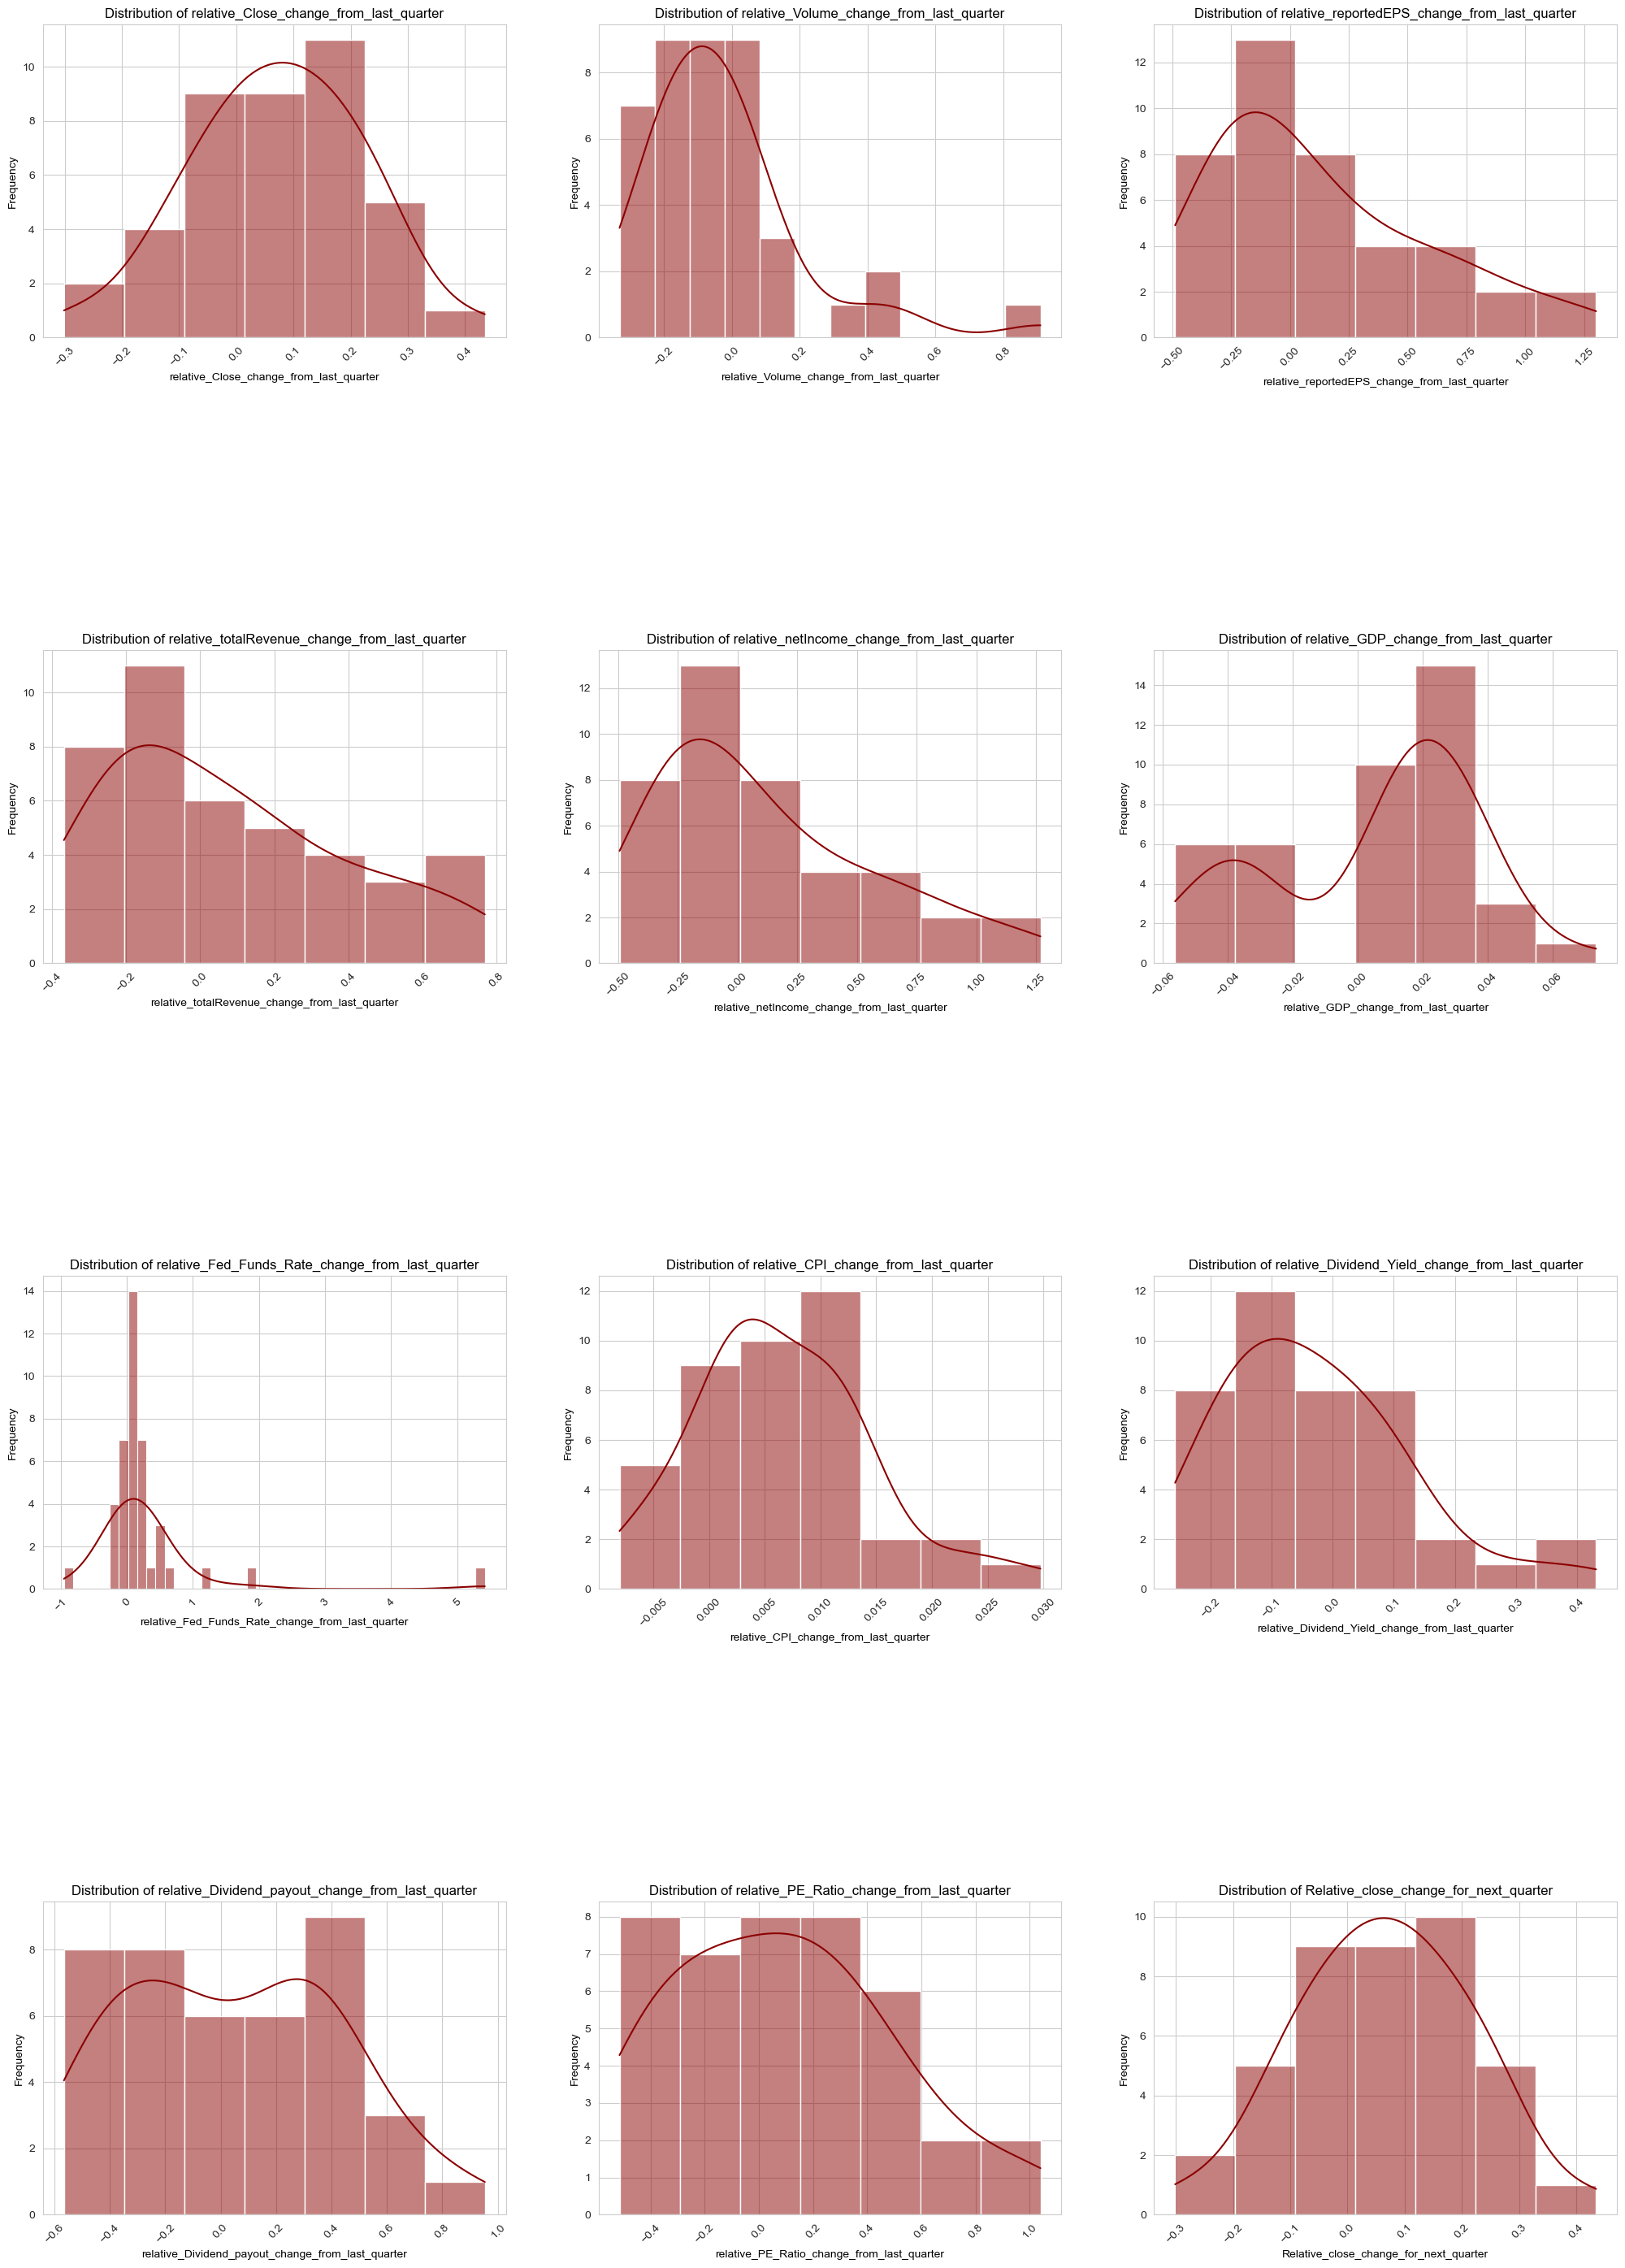

In [103]:
import seaborn as sns
import math
num_columns = len(apple_df.columns)-1
num_rows = math.ceil(num_columns / 3)
num_cols = min(3, num_columns)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 35))
fig.subplots_adjust(hspace=1)

for index, column in enumerate([col for col in apple_df.columns if col != "Buy"]):
    row, col = divmod(index, num_cols)
    ax = axes[row, col]
    sns.histplot(apple_df[column], ax=ax, kde=True, color="darkred")
    ax.set_title("Distribution of " + column, color='black')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(column, color='black')
    ax.set_ylabel('Frequency', color='black')

plt.show()

The plots above, concerning the distribution of the features, show that the many features, like Distribution of relative_Dividend_payout_change_from_last_quarter, are not normally distributed - while some are like relative_Close_change_for_next_quarter.  

Also, the plots show that many features are right skewed, which can have impact on the linear regression model because there might be non linearity in the data.

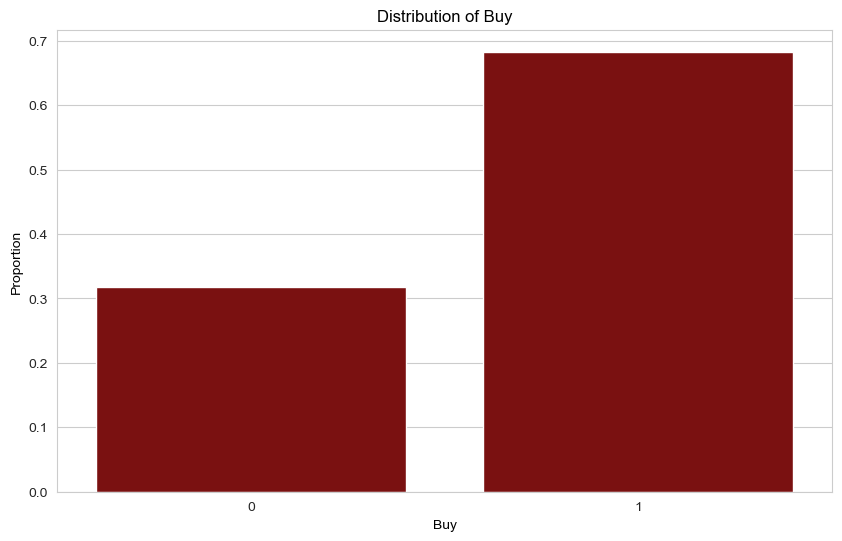

In [104]:
#We will now check if the distribution of our outcome variable is imbalanced or not using a simple bar plot

prop = apple_df.Buy.value_counts(normalize=True)
plt.figure(figsize=(10, 6))
sns.barplot(x=prop.index, y=prop.values, color="darkred")
plt.title("Distribution of Buy", color='black')
plt.xlabel("Buy", color='black')
plt.ylabel("Proportion", color='black')
plt.show()

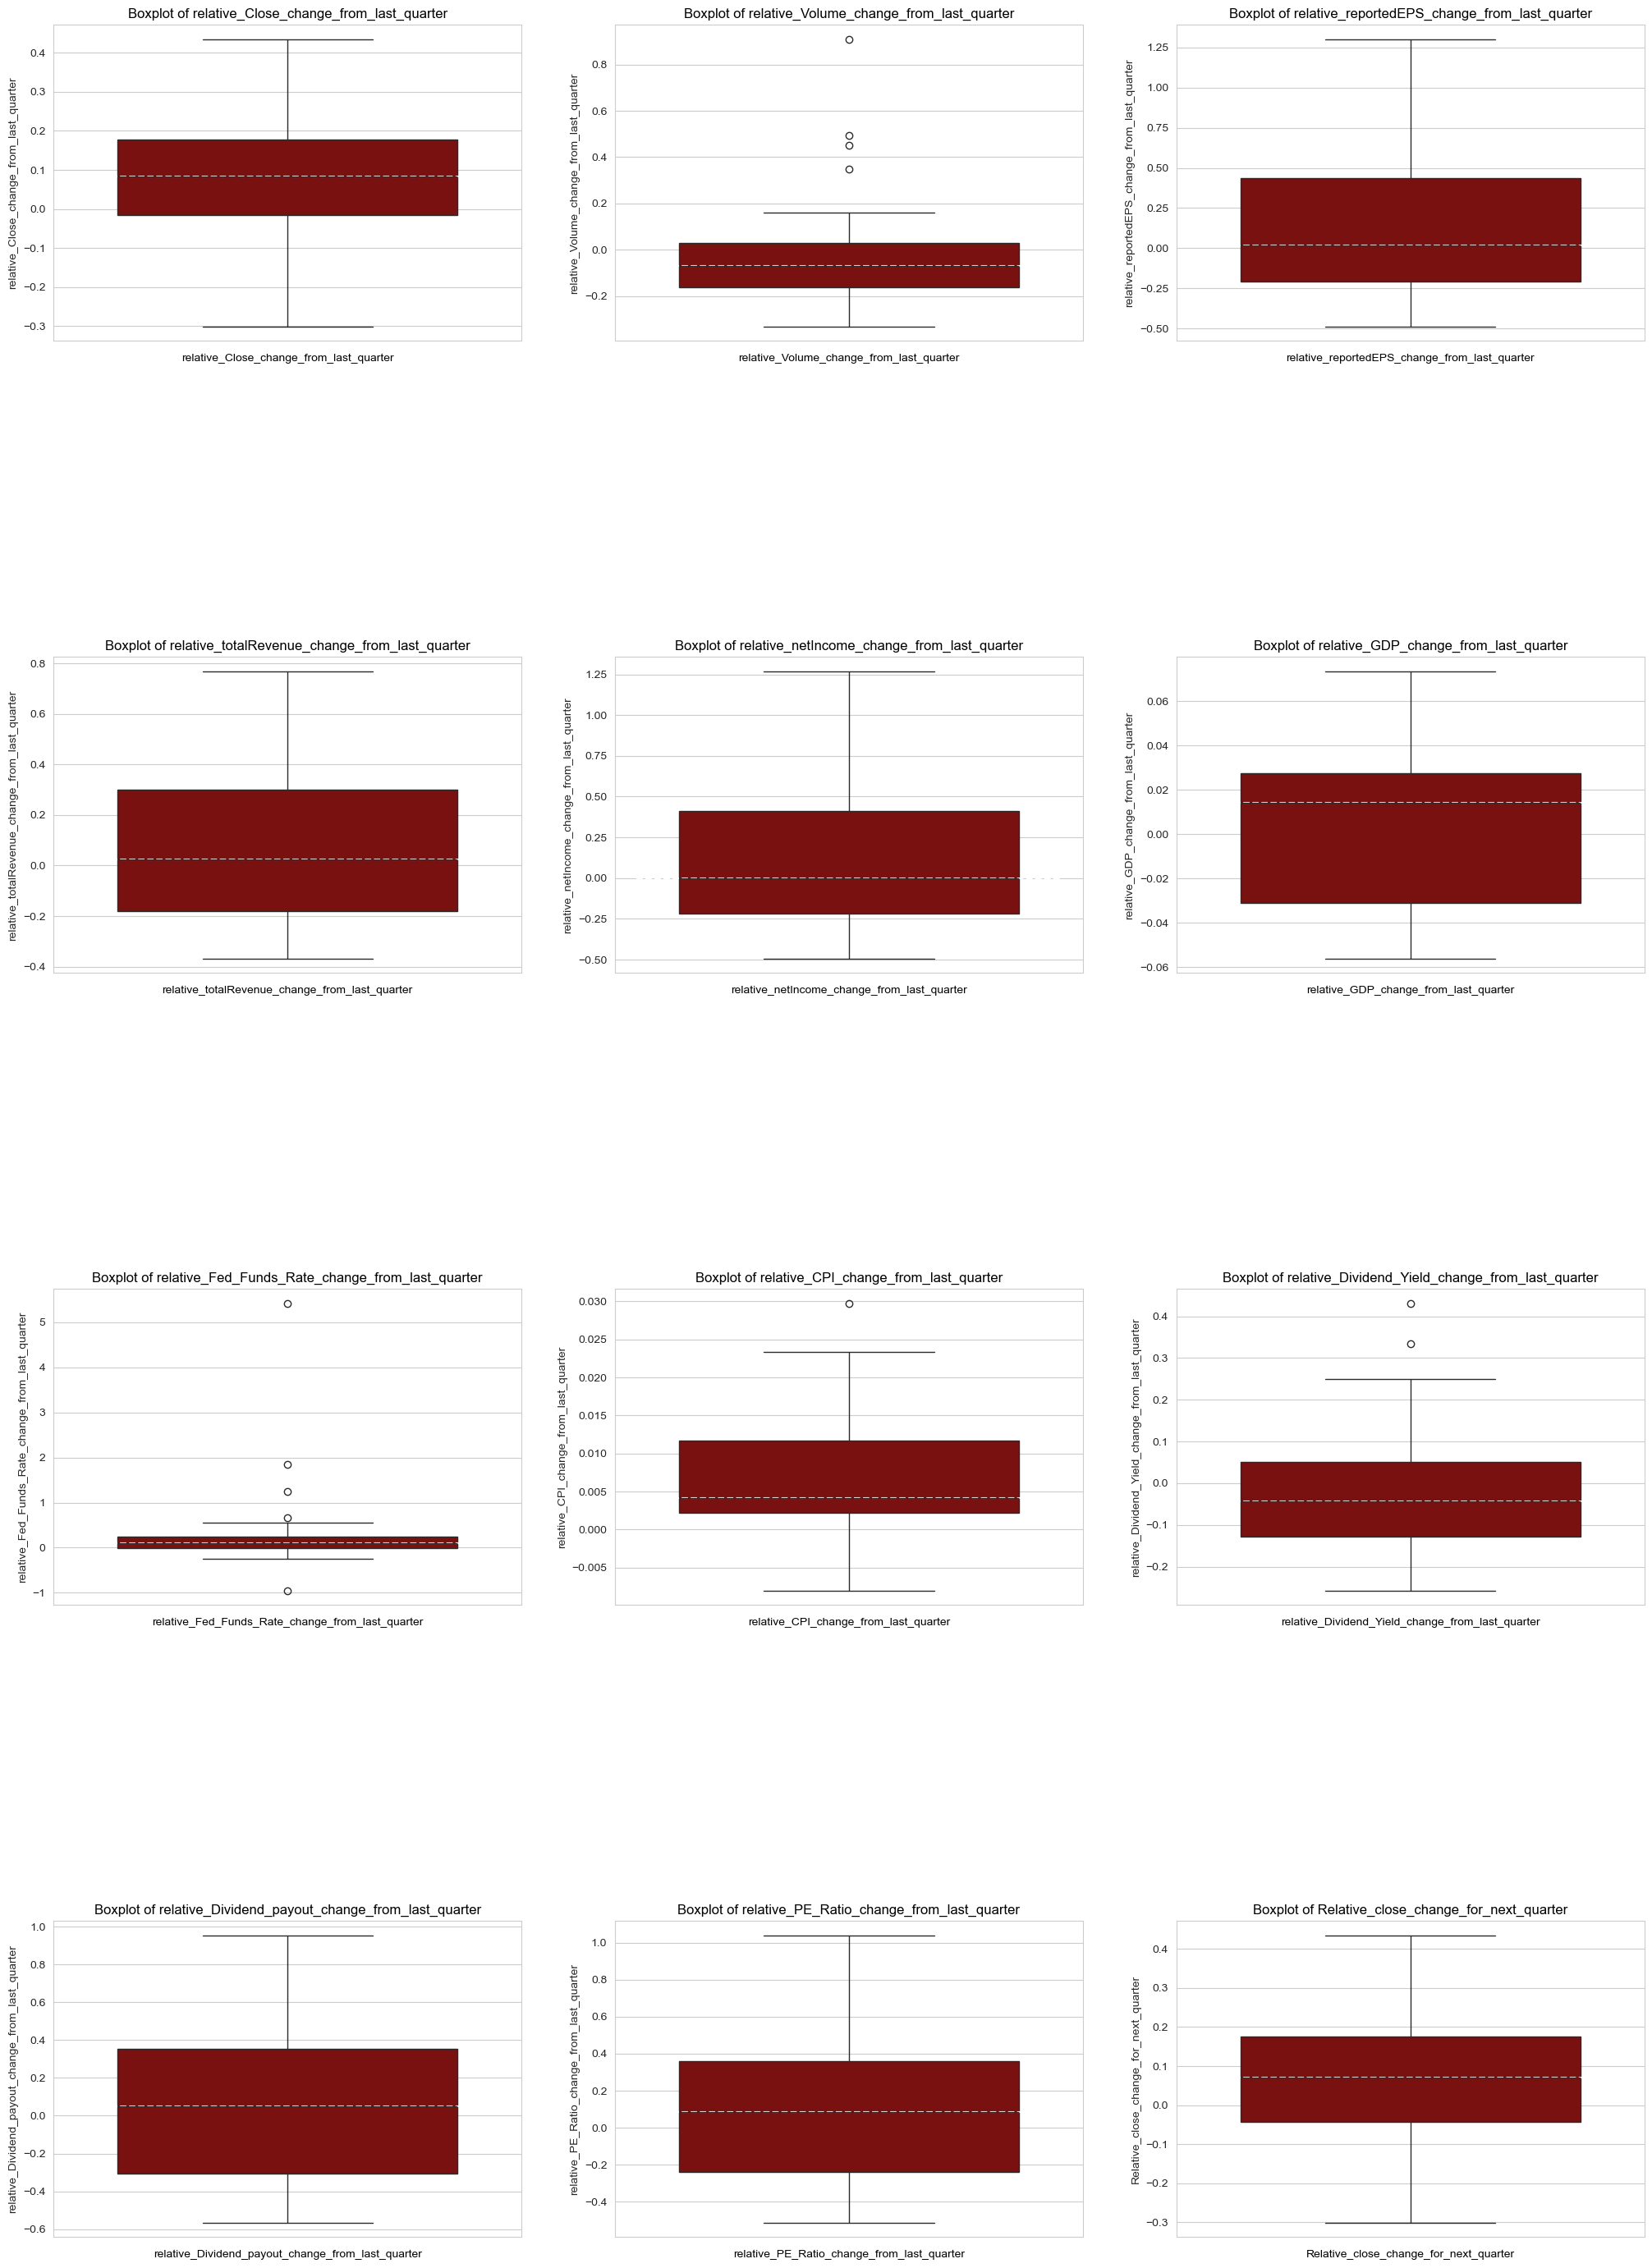

In [105]:
num_columns = len([col for col in apple_df.columns if col != "Buy"])
num_rows = math.ceil(num_columns / 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(25, 35))
fig.subplots_adjust(hspace=1)

for index, column in enumerate([col for col in apple_df.columns if col != "Buy"]):
    row, col = divmod(index, 3)
    ax = axes[row, col]
    sns.boxplot(apple_df[column], ax=ax, color="darkred")
    ax.set_title("Boxplot of " + column, color='black')
    ax.hlines(apple_df[column].median(), xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors='white', linestyles='--')
    ax.set_xlabel(column, color='black')

plt.show()

Very few of our columns have outliers. We will not remove them because they are valid data points given this is financial data and from domain knowledge, we know that interest rate, GDP, and for example, the stock price have been increasing over the years. The box plot above also helps us learn the spread of the each feature!

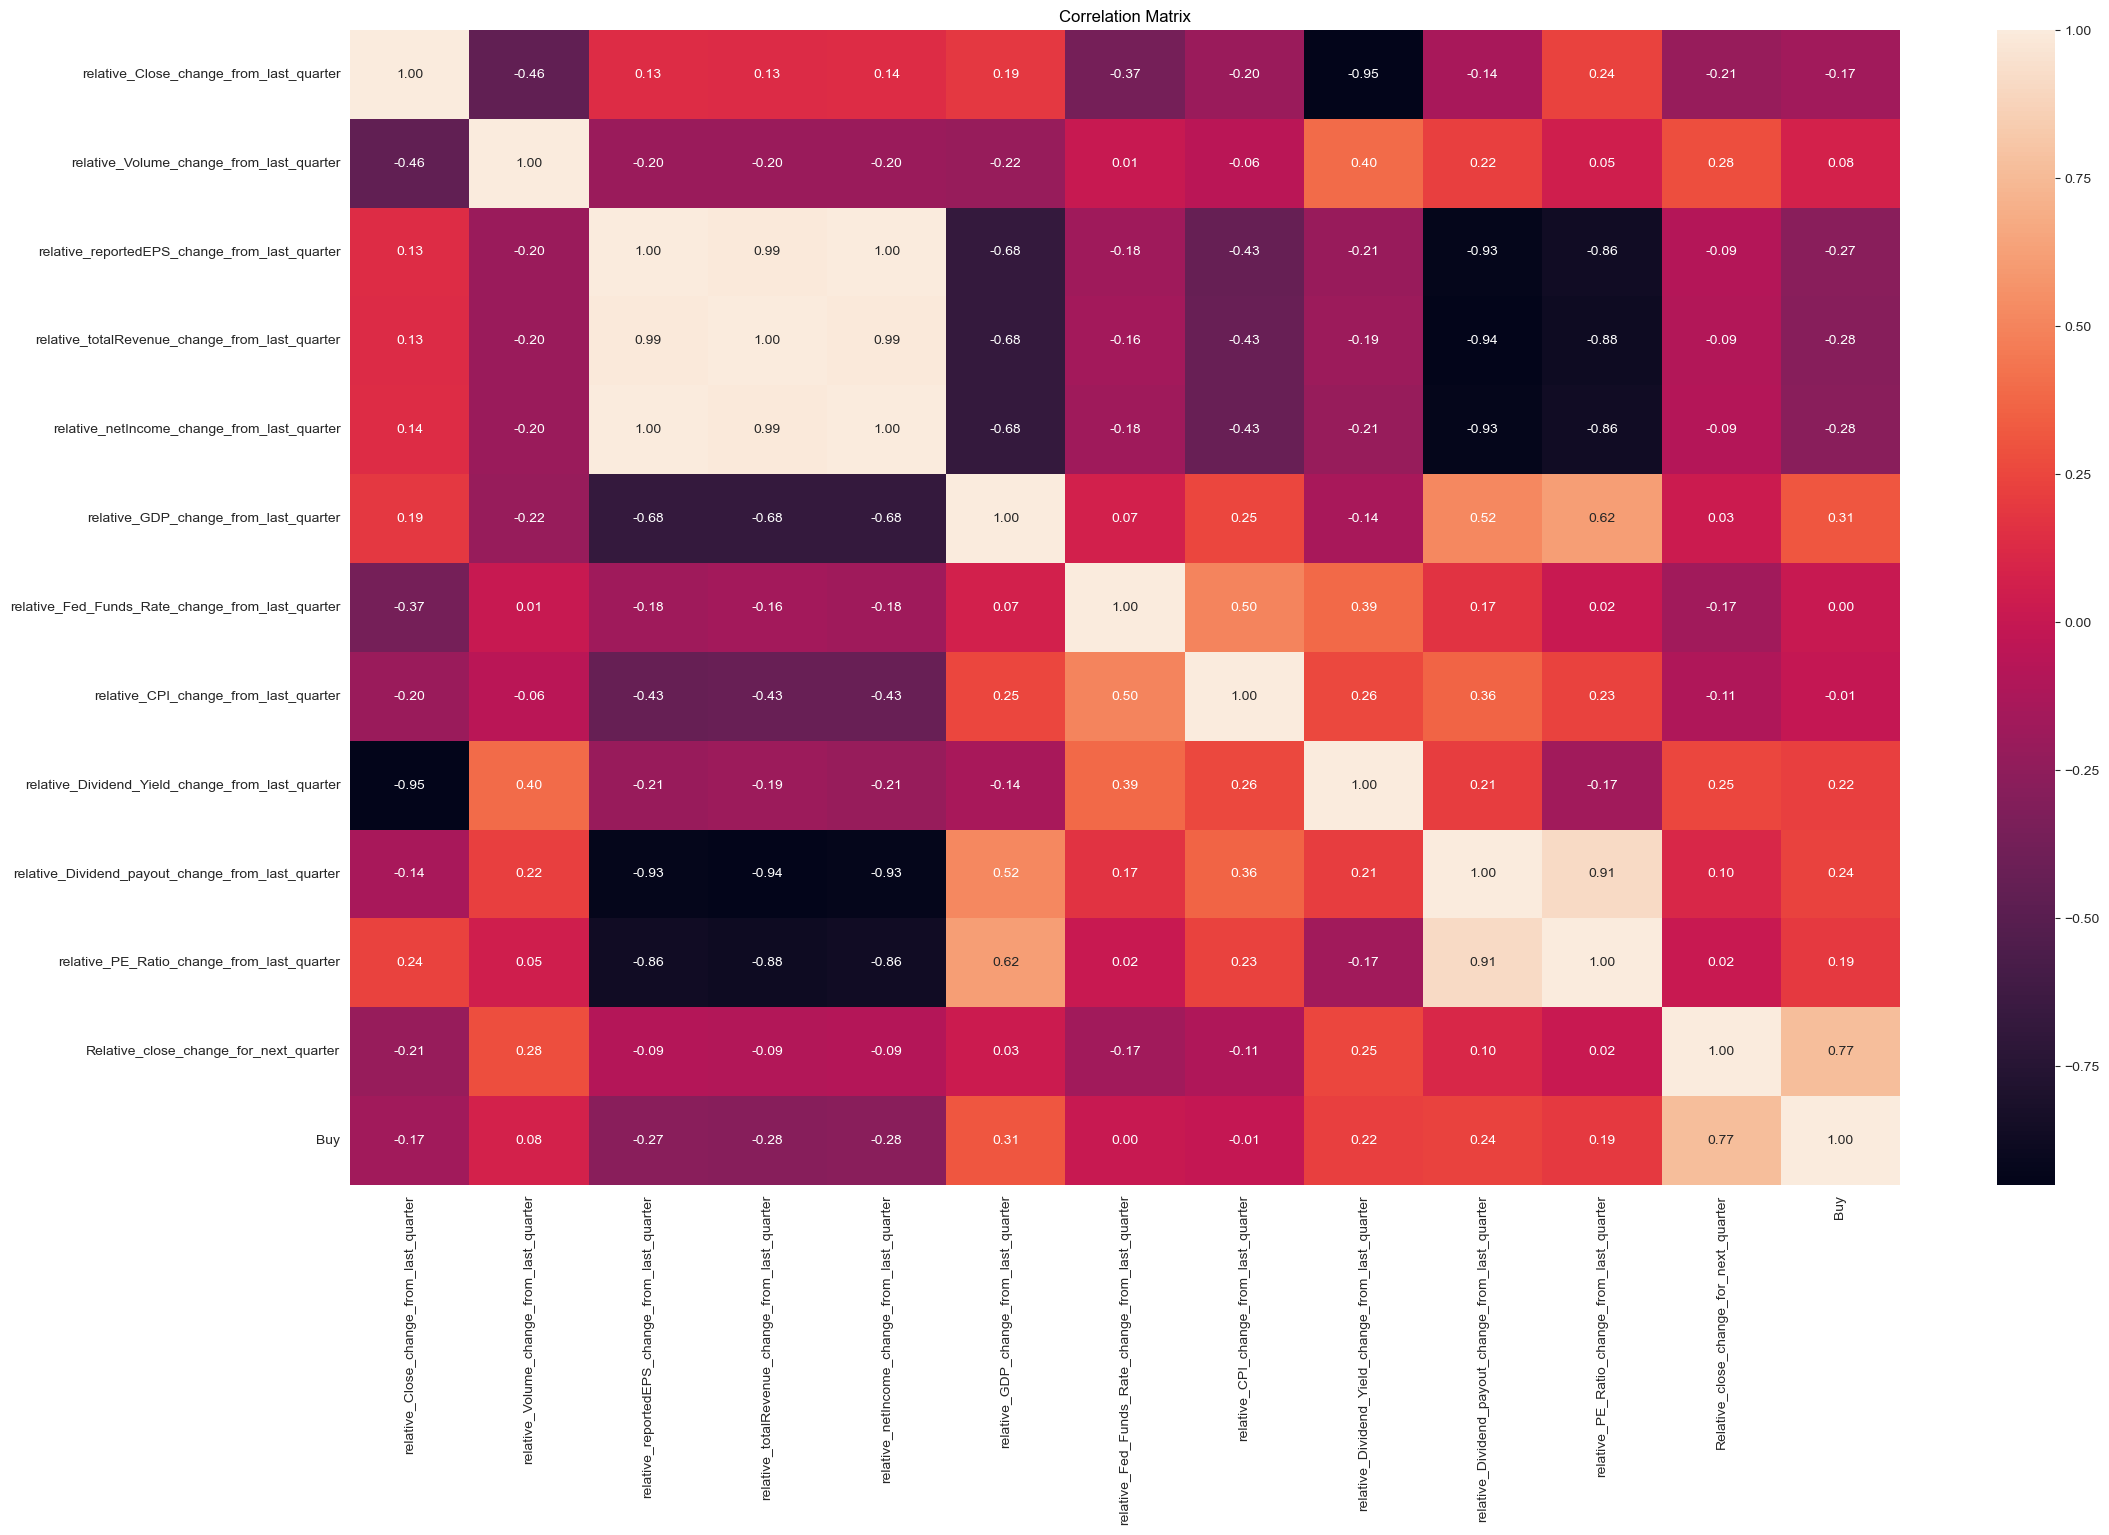

In [106]:
# Correlation matrix
correlation = apple_df.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title("Correlation Matrix", color='black')
plt.show()

It is extremely surprising to see that there is a negative relationship between the **relative_close_change_next quarter** and **relative_Close_change_from_last_quarter** / **relative_income_change_from_last_quarter**. One would rather expect that they must be positively correlated - but seems like the data is telling we can't precisely quanity the inherent structure of the stock market to predict whether to buy or not!

### Normalization 

We don't need normalization because most of our data is in [-1,1] range, as can be confirmed from the EDA section with the exception of `relative_Fed_Funds_Rate_change_from_last_quarter` which has a max value of 5. Well, as can be seen from the plot, this is a rare value and is due to a spike in Fed Rate in mid 2022. Because this is Financial data, it does not make sense to remove this outlier by replacing this with median because not only Fed Rate was changing, but also other economic indicators

<Axes: xlabel='timestamp'>

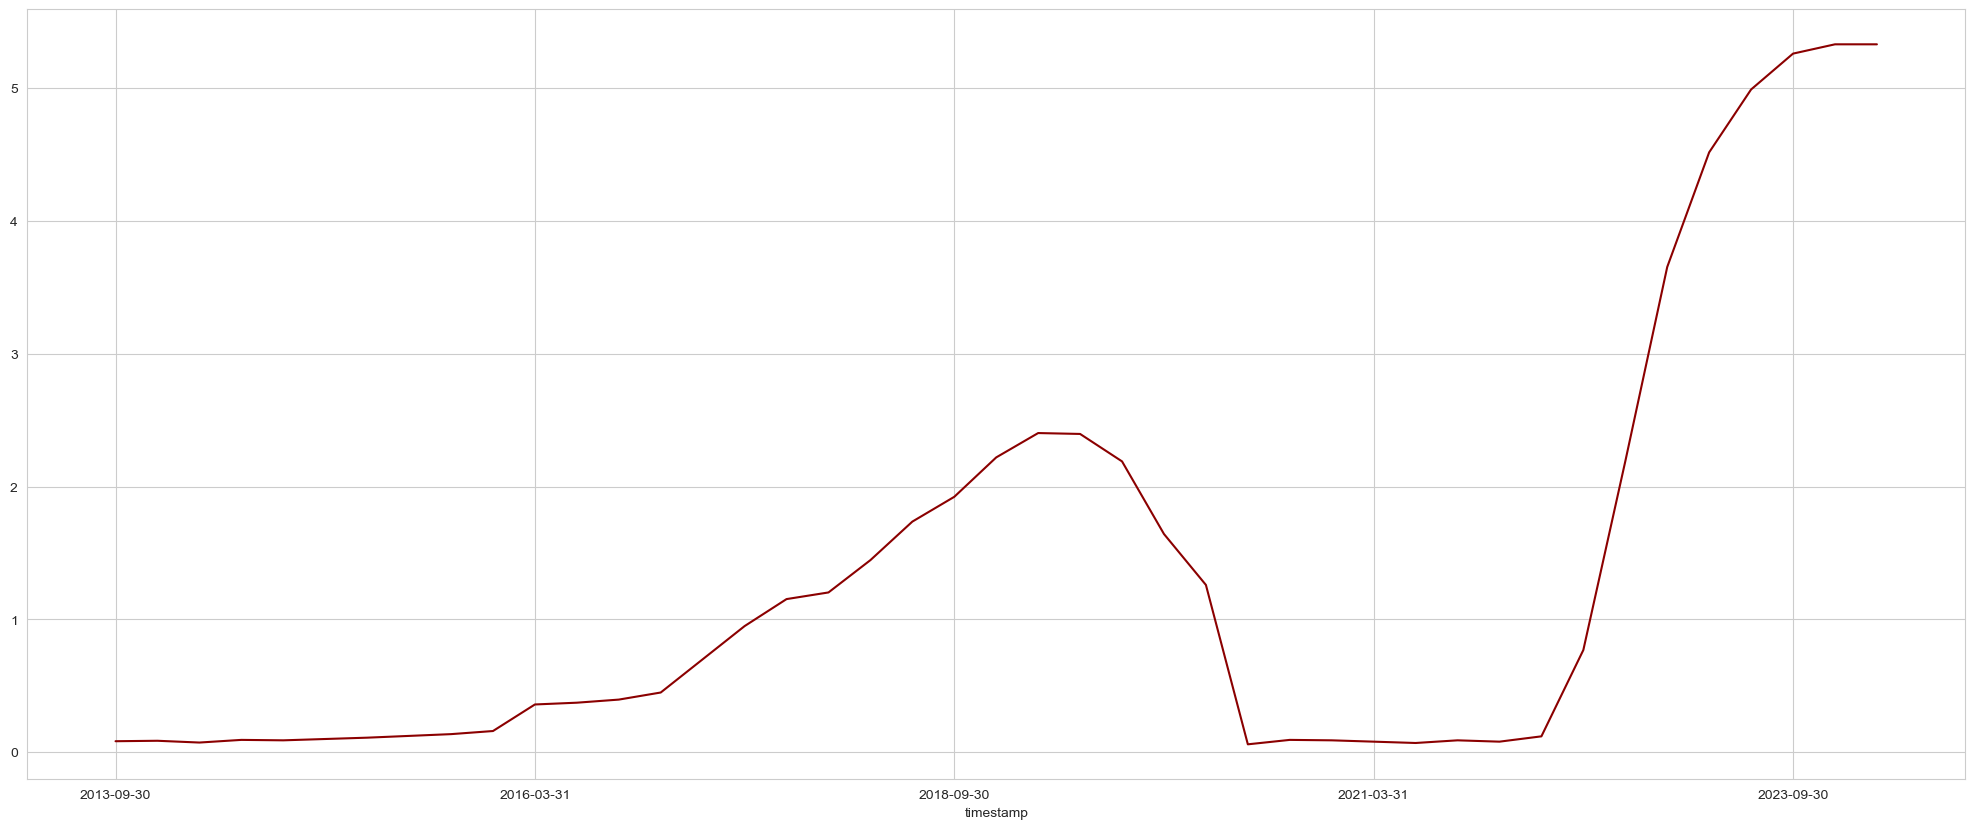

In [107]:
economic_df["Fed_Funds_Rate"].plot(figsize=(25, 10), color="darkred")

---
###  Modelling Section.

# Logistic Regression with Feature Engineering!

In [108]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

apple_log_r = apple_df.copy()
apple_log_r.drop(columns = ["Relative_close_change_for_next_quarter"], inplace = True)

model = LogisticRegression(class_weight="balanced") # because the classes are imbalanced

training_set = apple_log_r[apple_log_r.index < "2021-12-31"]
testing_set = apple_log_r[apple_log_r.index >= "2021-12-31"]

X_train = training_set.drop(columns=["Buy"])
y_train = training_set["Buy"]
X_test = testing_set.drop(columns=["Buy"])
y_test = testing_set["Buy"]

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [109]:
print(classification_report(y_test, y_pred))
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.50      0.50         4

    accuracy                           0.56         9
   macro avg       0.55      0.55      0.55         9
weighted avg       0.56      0.56      0.56         9

Test Accuracy: 0.5555555555555556


### Interpretation:


Model is, not surprisingly, more accurate then the naive benchmark, with accuracy of 56% (much lower than the model without feature engineering). This shows us that as dataset captures more complex information with the help of feature engineering, our model, being linear, is not able to capture tha patterns in the data well. 

However, as outlined in the start of the project, what matters most to us is the recall for class 0, which helps us avoid risk. We see that Logistic Regression gives us a Recall of 0.6, i.e. of all the instances that were actually negative, our model predicted 60% of them correctly, which is reasonable and better than the logistic regression without feature engineering. This also shows that the model is predicting positive for some cases, even if in reality the return is negative (thus precision of 50% for class 1 (Buy))

---
# Linear Regression with Feature Engineering

In [110]:
apple_lr = apple_df.copy()

In [111]:
apple_lr.drop(columns = ["Buy"], inplace = True)    

In [112]:
# Relative_close_change_for_next_quarter

training_set = apple_lr[apple_lr.index < "2021-12-31"]
testing_set = apple_lr[apple_lr.index >= "2021-12-31"]

X_train = training_set.drop(columns=["Relative_close_change_for_next_quarter"])
y_train = training_set["Relative_close_change_for_next_quarter"]
X_test = testing_set.drop(columns=["Relative_close_change_for_next_quarter"])
y_test = testing_set["Relative_close_change_for_next_quarter"]

Predictions: [ 0.06408687  0.05778484 -0.7159558  -0.22481796 -0.00697533]
Actuals: [-0.01667  -0.216998  0.010825 -0.059841  0.269145]
MSE: 0.09
MAE: 0.23
R2: -3.07
Accuracy: 0.33
              precision    recall  f1-score   support

        -1.0       0.33      0.20      0.25         5
         1.0       0.33      0.50      0.40         4

    accuracy                           0.33         9
   macro avg       0.33      0.35      0.33         9
weighted avg       0.33      0.33      0.32         9



<Axes: >

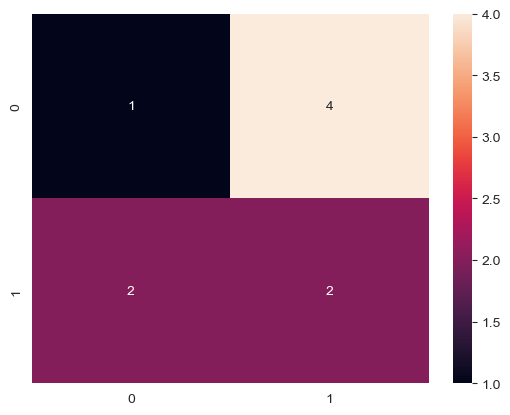

In [ ]:
from sklearn.linear_model import Ridge
# import the metrics for Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a linear regression model
lin_reg = Ridge(alpha=.2)

# Fit the model
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# print first 5 predictions and actuals
print(f"Predictions: {y_pred[:5]}")
print(f"Actuals: {y_test[:5].values}")

# Print the results
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2: {r2:.2f}")

# Calculate the accuracy by considering the sign of the predicted and actual values
correct_predictions = np.sum(np.sign(y_test) == np.sign(y_pred))
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy:.2f}")

# print the classification report
print(classification_report(np.sign(y_test), np.sign(y_pred)))
sns.heatmap(confusion_matrix(np.sign(y_test), np.sign(y_pred)), annot = True, fmt = 'd')

### Interpretation:

OOOPPSSS!!! It turns out that the model, being linear, is not performing well at all, with average MAE of 23% (our estimates off by 23%) and performs worse than the naive benchmark model in terms of accuracy - with accuracy score of just 33%. Also negative R2 score indicating that our model's independent variables are not able to explain the variability of the dependent variable in a regression model.

This shows us that as dataset captures more complex information with the help of feature engineering, our model, being linear, is not able to capture tha patterns in the data well. 

However, as outlined in the start of the project, what matters most to us is the recall for class 0, which helps us avoid risk. We see that Linear Regression now gives us a Recall of 0.2 (compared to .6 previosuly), i.e. of all the instances that were actually negative, our model predicted only 20% of them correctly, which is really poor performance!

--- 

# Support Vector Machine

### What is a Support Vector Machine?

A **Support Vector Machine (SVM)** is a supervised machine learning algorithm used for **classification** and **regression** problems. SVMs are particularly effective for binary classification tasks, where the goal is to identify a decision boundary that best separates two classes. 

In SVMs, the decision boundary is a hyperplane that maximizes the **margin** (distance) between the boundary and the closest data points (called **support vectors**) from each class. This leads to a robust and generalized model.

### Why is SVM Useful for Our Problem?

For our task of predicting whether the stock price will increase or not in the next quarter (`Buy` or `Not Buy`), SVM is a suitable choice because:

1. **Effective in High-Dimensional Spaces**: SVM handles many features efficiently, even when the number of features exceeds the number of samples.
2. **Works Well with Small to Medium-Sized Datasets**: SVM does not require massive datasets to achieve good performance.
3. **Handles Non-Linear Decision Boundaries**: By using kernel tricks, SVM can identify complex decision boundaries, which is important if the relationship between features and the target variable is not linear - as demonstrated previously by example of Linear Regresison and Logistic Regression.

In our case, SVM can use features like **relative_Close_change**, **relative_Volume_change**, **relative_GDP_change**, and **relative_Fed_Funds_Rate** to find patterns and classify whether to **"Buy"** or **"Not Buy"** for the next quarter, no matter how complex the relationship is between the predictor variables. 

---

### Important Parameters of SVM

SVM has several hyperparameters that influence its performance. Below are the key ones we will focus on:

1. `C` **(Regularization Parameter)**    
> The `C` parameter controls the **trade-off between maximizing the margin** and **minimizing classification errors**.  
A **small** `C` value allows for a **larger margin** and tolerates some misclassifications (simpler model, less overfitting). A **large `C`** value forces the model to classify all training data correctly, potentially leading to overfitting.  
  - Start with the default value `C=1.0`.
  - Increase `C` for more strict classification and decrease `C` to allow flexibility.

2. `kernel` **(Kernel Function)**  
> The `kernel` parameter determines the type of **hyperplane** or decision boundary used to separate the classes. It enables SVM to capture non-linear relationships in the data.  
 - **Common kernel types**:
  - **`linear`**: A simple linear boundary (fast and efficient for linearly separable data).
  - **`rbf` (Radial Basis Function)**: Maps the data to a higher-dimensional space to find non-linear boundaries.
  - **`poly`**: Polynomial kernel, used for more complex non-linear boundaries.   
  - Start with **`rbf`** as it works well in most cases.
  - Use **`linear`** if the data is linearly separable or has many features.

3. `gamma` **(Kernel Coefficient)**  
  > The `gamma` parameter controls the influence of individual training points in the `rbf` and `poly` kernels. It defines how far a single training point's influence reaches.
  - A **small** `gamma` value considers points far from the decision boundary, leading to a smoother, generalized model.
  - A **large** `gamma` value focuses on points very close to the boundary, resulting in a complex, localized decision surface (can cause overfitting).  
  - Start with `gamma='scale'`, which adjusts the value automatically based on the input features.
  - Use **small values** (e.g., `0.01`) for a smoother model or **large values** (e.g., `1.0`) for more complex decision boundaries.

4. `class_weight` **(Handling Imbalanced Classes)**  
> The `class_weight` parameter helps address **imbalanced datasets** by assigning higher weights to underrepresented classes. This ensures that the model does not bias towards the majority class. Options:
  - `None`: Equal weight for all classes (default).
  - `balanced`: Automatically adjusts weights inversely proportional to class frequencies.
  - Use `class_weight='balanced'` when there is significant class imbalance (e.g., if "Buy" occurs much less frequently than "Not Buy").

---

### Summary of Parameters

| Parameter       | Description                              | Default Value   | When to Tune           |
|-----------------|------------------------------------------|-----------------|------------------------|
| **`C`**        | Regularization strength                  | `1.0`           | Overfitting/Underfitting|
| **`kernel`**   | Type of kernel function                  | `'rbf'`         | Linear vs Non-linear   |
| **`gamma`**    | Influence of individual training points  | `'scale'`       | Smooth vs Complex Model|
| **`class_weight`** | Adjust weights for imbalanced classes   | `None`          | Imbalanced datasets    |


### Conclusion

Support Vector Machines are a powerful choice for classification tasks, especially when dealing with non-linear relationships or high-dimensional data. By tuning hyperparameters like **`C`**, **`gamma`**, and **`class_weight`**, we can optimize the model to achieve the best performance for predicting **"Buy" or "Not Buy"** in our stock dataset.

--- 

In [114]:
apple_svm = apple_df.copy()
apple_svm.drop(columns = ["Relative_close_change_for_next_quarter"], inplace = True)

In [115]:
# From the EDA, we remember that our target class is imbalanced, so when instantiating the model, we will take this into account.

prop = apple_svm.Buy.value_counts(normalize=True)
print(f"Proportion of Buy: {prop[1]:.2f} and Sell: {prop[0]:.2f}")

Proportion of Buy: 0.68 and Sell: 0.32


In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Divide the data into training and testing sets based on the date
training_set = apple_svm[apple_svm.index < "2021-12-31"]
testing_set = apple_svm[apple_svm.index >= "2021-12-31"]

# Define the features and target variable for both training and testing sets
X_train = training_set.drop(columns=["Buy"])
y_train = training_set["Buy"]
X_test = testing_set.drop(columns=["Buy"])
y_test = testing_set["Buy"]

# Initialize the model
model = SVC(C=10, class_weight="balanced")

# Train the model
model.fit(X_train, y_train)

# print the training accuracy
print(f"Training Accuracy: {model.score(X_train, y_train):.2f}")

# Predict the target variable for the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Training Accuracy: 0.88
Testing Accuracy: 0.67


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.57      1.00      0.73         4

    accuracy                           0.67         9
   macro avg       0.79      0.70      0.65         9
weighted avg       0.81      0.67      0.64         9



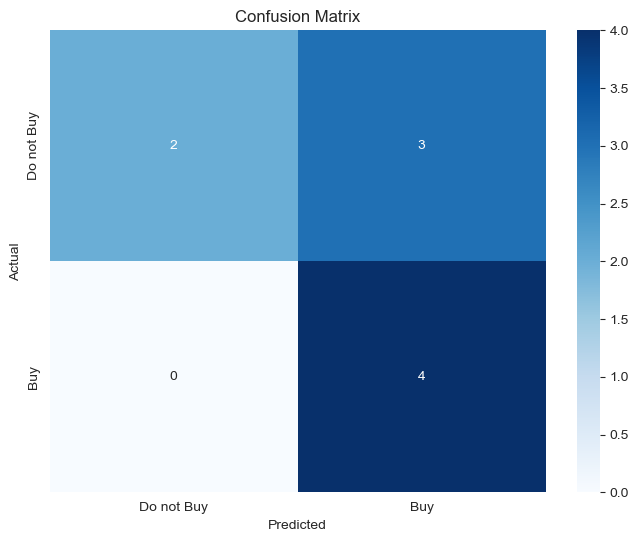

In [ ]:
# print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


# plot the confusion matrix with appropriate labels
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Do not Buy", "Buy"], yticklabels=["Do not Buy", "Buy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Model, is not surprisingly, more accurate then the naive benchmark, with accuracy of again 67%. However, as outlined in the start of the project, what matters most to us is the recall for class 0, which helps us avoid risk. We see that SVM gives us a Recall of 0.4 (previously .6), i.e. of all the instances that were actually negative, our model only predicted 40% of them correctly, which is risky. Recall score of 40% also shows that the model is predicting positive return for some cases, even if in reality the return is negative (thus precision of 57% for class 1 (Buy)). However, what changed this time is that the model has started to give excpetional recall for class 1 - a 100% recall i.e. of all the instances that were actually positive, our model predicted all of them correctly.

---
# LSTM - Doubts

In [118]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import classification_report

torch.manual_seed(42)

batch_size = 4  # Smaller batch size for a small dataset

# Define the target and features
target = "Buy"  # Binary classification target: Buy (1) or Not (0) for the next quarter
features = [col for col in apple_svm.columns if col != target]

# Convert the data into sequences for LSTM input
def create_sequences(data, seq_length=4):
    if len(data) <= seq_length:
        raise ValueError("Not enough data to create even one sequence.")
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i+seq_length][features].values
        label = data.iloc[i+seq_length][target]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Create sequences
X, y = create_sequences(apple_svm, seq_length=4)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape to match output
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)    # Reshape to match output

# Create DataLoader for training and testing sets
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [119]:
# LSTM Model
class LSTM_Model(nn.Module):
    def __init__(self, input_size, hidden_layer_size, num_layers, output_size=1):
        super(LSTM_Model, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, 
                            hidden_size=hidden_layer_size, 
                            num_layers=num_layers, 
                            batch_first=True)
        self.fc = nn.Linear(hidden_layer_size, output_size)
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]  # Only the output of the last time step
        predictions = self.fc(lstm_out)
        return predictions

In [120]:
# Model hyperparameters
input_size = len(features)  # Number of features
hidden_layer_size = 32
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 20

# Model instantiation
model = LSTM_Model(input_size=input_size, hidden_layer_size=hidden_layer_size, output_size=output_size, num_layers=num_layers)

# Loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)  # Model forward pass
        loss = criterion(outputs, y_batch)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Testing the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    probabilities = torch.sigmoid(outputs)  # Apply sigmoid for probabilities
    predicted = (probabilities > 0.5).float()  # Threshold at 0.5
    print("Classification Report:")
    print(classification_report(y_test, predicted.numpy()))


Epoch [1/20], Loss: 0.7008
Epoch [2/20], Loss: 0.6796
Epoch [3/20], Loss: 0.6778
Epoch [4/20], Loss: 0.6669
Epoch [5/20], Loss: 0.6586
Epoch [6/20], Loss: 0.6530
Epoch [7/20], Loss: 0.6056
Epoch [8/20], Loss: 0.5907
Epoch [9/20], Loss: 0.5726
Epoch [10/20], Loss: 0.5609
Epoch [11/20], Loss: 0.5611
Epoch [12/20], Loss: 0.5597
Epoch [13/20], Loss: 0.6692
Epoch [14/20], Loss: 0.5538
Epoch [15/20], Loss: 0.5571
Epoch [16/20], Loss: 0.5535
Epoch [17/20], Loss: 0.5541
Epoch [18/20], Loss: 0.6643
Epoch [19/20], Loss: 0.5536
Epoch [20/20], Loss: 0.5542
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         1.0       0.50      1.00      0.67         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
